In [1]:
!date

Sat Feb 19 22:40:21 UTC 2022


In [ ]:
#Datasets too large to be run on Colab

In [1]:
import requests
import os


In [2]:
#Download datasets




from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
	url = 'https://api.datacite.org/dois/'+doi+'/media'
	r = requests.get(url).json()
	netcdf_url = r['data'][0]['attributes']['url']
	r = requests.get(netcdf_url,stream=True)
	#Set file name
	fname = doi.split('/')[-1]+ext
	#Download file with progress bar
	if r.status_code == 403:
		print("File Unavailable")
	if 'content-length' not in r.headers:
		print("Did not get file")
	else:
		with open(fname, 'wb') as f:
			total_length = int(r.headers.get('content-length'))
			pbar = tnrange(int(total_length/1024), unit="B")
			for chunk in r.iter_content(chunk_size=1024):
				if chunk:
					pbar.update()
					f.write(chunk)
		return fname



#SMART-seq VMH data
#metadata.csv
download_file('10.22002/D1.2067','.gz')

#smartseq.mtx (log counts)
download_file('10.22002/D1.2071','.gz')



#MERFISH data
#metadata.csv
download_file('10.22002/D1.2063','.gz')

#counts.h5ad
download_file('10.22002/D1.2064','.gz')

#10x VMH data
#metadata.csv
download_file('10.22002/D1.2065','.gz')

#tenx.mtx (log counts)
download_file('10.22002/D1.2072','.gz')



os.system("gunzip *.gz")



os.system("mv D1.2067 smartmetadata.csv")
os.system("mv D1.2071 smartseq.mtx")

os.system("mv D1.2063 metadata.csv")
os.system("mv D1.2064 counts.h5ad")

os.system("mv D1.2065 tenxmetadata.csv")
os.system("mv D1.2072 tenx.mtx")


#C. elegans data
#Pseudotime Packer & Zhu C. elegans data
#counts.mtx
download_file('10.22002/D1.2060','.gz')

#cells.csv
download_file('10.22002/D1.2061','.gz')

#genes.csv
download_file('10.22002/D1.2062','.gz')

os.system("gunzip *.gz")

os.system("mv D1.2060 wormcounts.mtx")
os.system("mv D1.2061 wormcells.csv")
os.system("mv D1.2062 wormgenes.csv")




/home/tchari/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/64 [00:00<?, ?B/s]

  0%|          | 0/26700 [00:00<?, ?B/s]

  0%|          | 0/9784 [00:00<?, ?B/s]

  0%|          | 0/59360 [00:00<?, ?B/s]

  0%|          | 0/940 [00:00<?, ?B/s]

  0%|          | 0/104912 [00:00<?, ?B/s]

  0%|          | 0/14905 [00:00<?, ?B/s]

  0%|          | 0/561 [00:00<?, ?B/s]

  0%|          | 0/165 [00:00<?, ?B/s]

0

In [3]:
#Read in files from NCBI GEO
os.system("wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.MetaData.105.csv.gz")
os.system("wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv.gz")

os.system("wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv.gz")


0

In [4]:
os.system("gunzip *.gz")

0

In [5]:
os.system("git clone https://github.com/hhcho/densvis.git")

Cloning into 'densvis'...


0

In [2]:
%cd ./densvis/densne/


!g++ sptree.cpp densne.cpp densne_main.cpp -o den_sne -O2
import densne

/home/tchari/densvis/densne


In [3]:
%cd ../../

/home/tchari


In [8]:
!gunzip *.gz

gzip: *.gz: No such file or directory


In [9]:
!git clone https://github.com/pachterlab/CP_2022.git

Cloning into 'CP_2022'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 171 (delta 71), reused 77 (delta 17), pack-reused 0
Receiving objects: 100% (171/171), 55.23 MiB | 29.73 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [4]:
%cd ./CP_2022/scripts

/home/tchari/CP_2022/scripts


In [8]:
# !pip3 install --quiet torch
# !pip3 install --quiet anndata
# !pip3 install --quiet matplotlib
# !pip3 install --quiet scikit-learn
# !pip3 install --quiet torchsummary
# !pip install --quiet scanpy==1.7.0rc1
# !pip3 install --quiet umap-learn

## **Install Packages**

In [76]:
import networkx as nx
import anndata 
import pandas as pd
import numpy as np

import visualizations as vis
import tools as tl
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
#import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
import matplotlib.patches as patches
import itertools
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline
sc.set_figure_params(dpi=125)
#sns.set_style('white')

In [6]:
sc.set_figure_params(dpi=125)

In [18]:
# import torchvision

# mnist = torchvision.datasets.MNIST(root='.', download=True)

In [17]:
# torch.manual_seed(0)

# mnist_flattened = mnist.data.reshape((mnist.data.shape[0], -1))
# n_images = 60000
# indices = torch.randperm(mnist_flattened.shape[0])[:n_images]
# data = mnist_flattened[indices].float()
# digits = mnist.targets[indices]
# batch_size = n_images // 10

In [16]:
# digits

In [15]:
# data.shape

## **Plot Distributions of Ambient and Latent Inter/Intra-Type Distance**

In [7]:

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '../..'

pcs = 50
n_latent = 50


In [8]:
def latentCompParams(scaled_mat, log_mat, ndims=2, neigh=[15,50,100], rounds = 3):
  """ Compute latent space representations as baseline for reconstruction abilities"""
   # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  #tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  latents += [log_mat]
  latentLab += ['Ambient']
  latentType += ['Ambient']

  tsvd = TruncatedSVD(n_components=pcs)
  x_pca = tsvd.fit_transform(scaled_mat)

  for i in range(rounds):

    for j in neigh:
      reducer = umap.UMAP(n_components = ndims, n_neighbors=j)
      pcaUMAP = reducer.fit_transform(x_pca)
      #pcaDensUMAP = densUMAP.fit_transform(x_pca)

      #pcaTSNE = tsne.fit_transform(x_pca)

      latents += [pcaUMAP]
      latentLab += ['PCA '+str(pcs)+'D UMAP '+str(j)]
      latentType += ['2D']

  latents += [x_pca]
  latentLab += ['PCA '+str(pcs)+'D']
  latentType += [str(pcs)+'D']




  return latents,latentLab,latentType

In [9]:
def latentCompMNIST(scaled_mat,log_mat, ndims=2, pcs=[50,100], rounds = 3):
  """ Compute latent space representations as baseline for reconstruction abilities"""
  reducer = umap.UMAP(n_components = ndims) # random_state = state
	#densUMAP = umap.UMAP(n_components = ndims,densmap=True)
  tsne = TSNE(n_components = ndims) 

  latents = []
  latentLab = []
  latentType = []

  latents += [log_mat]
  latentLab += ['Ambient']
  latentType += ['Ambient']


  for i in range(rounds):

    for j in pcs:

      tsvd = TruncatedSVD(n_components=j)
      x_pca = tsvd.fit_transform(scaled_mat)
    
      pcaUMAP = reducer.fit_transform(scaled_mat)
      #pcaDensUMAP = densUMAP.fit_transform(x_pca)

      pcaTSNE = tsne.fit_transform(scaled_mat)

      latents += [x_pca,pcaTSNE, pcaUMAP]
      latentLab += ['PCA '+str(j)+'D','t-SNE','UMAP']
      latentType += [str(j)+'D','2D','2D']

  tsvd = TruncatedSVD(n_components=2)
  x_pca = tsvd.fit_transform(scaled_mat)

  latents += [x_pca]
  latentLab += ['PCA 2D']
  latentType += ['2D']


  return latents,latentLab,latentType

In [10]:
def getInterVar2(embed, inLab):
  """ Compute inter-distances for inner label
  embed : Numpy array for latent space (n_obs x n_features or n_latent)
  inLab : 1D array for inner label (e.g. sex)
  Returns:
  List of average pairwise distances between labels in inLab"""


  avg_dists = []

  ins = np.unique(inLab)

  pairs = list(itertools.combinations(ins, 2))
  for p in pairs:

    sub_1 = embed[inLab == p[0],:]
    sub_2 = embed[inLab == p[1],:]
    avg_dists += [np.mean(pairwise_distances(sub_1,sub_2,metric='l1').flatten().tolist())]

  return avg_dists

In [11]:
def getAllVars(latents,latentLab,latentType,clusters):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]
    d = latentType[p]

    c = getInterVar2(i, clusters)
    #c = [x for x in c if x != 0.0]
    vals += c
    emb += [l]*len(c)
    dist += ['Inter-Type']*len(c)

    intraC = tl.getIntraVar(i, clusters, clusters)
    vals += intraC
    dist += ['Intra-Type']*len(intraC)

    emb += [l]*len(intraC)



  allVals['Latent'] = emb
  allVals['Distance'] = dist
  allVals['Value'] = vals



  return allVals

In [12]:
def rankClus(embed, inLab):
  """ Compute inter-distances for inner label
  embed : Numpy array for latent space (n_obs x n_features or n_latent)
  inLab : 1D array for inner label (e.g. sex)
  Returns:
  Dictionary with avg distances between labeled groups, for each label"""


  avg_dists = []
  

  ins = np.unique(inLab)
  d = np.zeros((len(ins),len(ins)))

  for i in range(len(ins)):

    avg_dists = []
    for j in ins:

      sub_1 = embed[inLab == ins[i],:]
      sub_2 = embed[inLab == j,:]
      avg_dists += [np.mean(pairwise_distances(sub_1,sub_2,metric='l1').flatten().tolist())]
      
    d[i,:] = avg_dists



  return d

In [13]:
def intraVar(embed, inLab):
  """ Compute inter-distances for inner label
  embed : Numpy array for latent space (n_obs x n_features or n_latent)
  inLab : 1D array for inner label (e.g. sex)
  Returns:
  Dictionary with avg distances between labeled groups, for each label"""


  avg_dists = []
  

  ins = np.unique(inLab)


  for i in range(len(ins)):



    sub_1 = embed[inLab == ins[i],:]

    avg = pairwise_distances(sub_1,sub_1,metric='l1').flatten().tolist()
    avg_dists += [np.mean([i for i in avg if i != 0])]
      




  return avg_dists

In [14]:
def getAllNeigh(latents,latentLab,latentType,clusters):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  amb = latents[0]
  cAmb = rankClus(amb, clusters)

  latents = latents[1:]
  latentLab = latentLab[1:]

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]


    c = rankClus(i, clusters)
    #c = [x for x in c if x != 0.0]

    for x in range(c.shape[0]):
      tau, p_value = stats.kendalltau(c[x,:], cAmb[x,:])
      vals += [tau]


    emb += [l]*c.shape[0]
 

  allVals['Latent'] = emb

  allVals['Tau'] = vals



  return allVals

In [15]:
def getIntra(latents,latentLab,latentType,clusters):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  amb = latents[0]
  cAmb = intraVar(amb, clusters)

  latents = latents[1:]
  latentLab = latentLab[1:]

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]


    c = intraVar(i, clusters)
    #c = [x for x in c if x != 0.0]


    v = stats.pearsonr(c, cAmb)
    vals += [v[0]]


    emb += [l]
 

  allVals['Latent'] = emb

  allVals['r'] = vals



  return allVals

In [16]:
#How many of each digit were in the same cluster
#for each digit, get indices, find how many of those indices have the same value in labels
def getKMeans(labels,origLabs,name):
  frac = []
  for d in pd.unique(origLabs):

    inds = origLabs.isin([d])
    sub = labels[inds]

    unique, counts = np.unique(sub, return_counts=True)
    frac += [max(counts)/len(sub)]

  df = pd.DataFrame()
  df['Cluster'] = pd.unique(origLabs)
  df['Fraction'] = frac
  df['Embedding'] = [name]*len(frac)
  
  return df

Plotting

In [90]:
#Plot kmeans clusters colored by their majority cell type


def plotKmeans(latent,palette,labels,origLabs, size=5,figsize=(7,5),fname='',alpha=0.5):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
    for d in np.unique(labels):
        inds = labels == d
        kmeans = labels[inds]
        sub_d = origLabs[inds]
        unique, counts = np.unique(sub_d, return_counts=True)

        sub = latent[inds,:]
        #Get index of max counts
        clus = unique[np.argmax(counts)]
        
    
        #sns.scatterplot(sub[:,0],sub[:,1],label=clus, color = palette[clus], alpha=0.5,size=size,legend=False)
        sns.scatterplot(sub[:,0],sub[:,1],hue=[clus]*sub.shape[0], palette = palette, alpha=alpha,s=size)



    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
    ax.set_axis_off()


    plt.grid(False)
    fig.tight_layout()

    if(fname != None):
        plt.savefig(fname)
    else:
        plt.show()

  


In [88]:
#Paint correct cells on bottom and 'wrongly' clustered digits on top
#Use Kmeans cluster labels


#For each set of Kmeans clusters inds paint cells in majority cell type label/cluster first
def plotOnTop(latent,palette,labels,origLabs, size=5,figsize=(7,5),fname='',alpha=0.5):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
    for d in np.unique(labels): #pd.unique(origLabs):
        inds = labels == d #origLabs.isin([d])
        kmeans = labels[inds]
        #origLabs.isin([d])
        sub_d = origLabs[inds]
        unique, counts = np.unique(sub_d, return_counts=True) #kmeans

        sub = latent[inds,:]
        #Get index of max counts
        clus = unique[np.argmax(counts)]
        cInds = sub_d.isin([clus])#kmeans == clus

        sub_d = sub_d[cInds]

        sub = sub[cInds,:]

        sns.scatterplot(sub[:,0],sub[:,1],hue=sub_d,palette=palette, alpha=alpha,s=size)

  #For each set of kmeans clusters paint cells in not the majority cell type/cluster
    for d in np.unique(labels): #pd.unique(origLabs):
        inds = labels == d #origLabs.isin([d])
        kmeans = labels[inds]
        sub_d = origLabs[inds]
        unique, counts = np.unique(sub_d, return_counts=True)

        sub = latent[inds,:]
        #Get index of max counts
        clus = unique[np.argmax(counts)]
        cInds = ~sub_d.isin([clus])#kmeans == clus

        sub_d = sub_d[cInds]

        sub = sub[cInds,:]

        sns.scatterplot(sub[:,0],sub[:,1],hue=sub_d,palette=palette,alpha=0.5,s=size)

    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
    ax.set_axis_off()


    plt.grid(False)
    fig.tight_layout()
    if(fname != None):
        plt.savefig(fname)
    else:
        plt.show()



In [19]:
def plotDots(ax,allVals, x, y ,hue, size, xlab='',ylab='',title='', axisFontSize = 11, tickFontSize = 10,legend=False):
  """ Plot histograms for inter/intra distances of nearest neighbors """

  #plt.figure(figsize=figsize)
  sns.boxplot(data=allVals, x=x, y=y, whis=np.inf,ax=ax,boxprops={'facecolor':'None'})
  if legend:
    g= sns.swarmplot(data=allVals, x=x, y=y, hue=hue, ax=ax,alpha=0.6,size=size) #
    labels=[t.get_text() for t in ax.legend_.texts]
    g.legend(handles=ax.legend_.legendHandles[3:6], labels=labels[3:6],prop={"size":9})
  else:
    g= sns.swarmplot(data=allVals, x=x, y=y, hue=hue, ax=ax,alpha=0.6,size=size)
    g.legend([],[], frameon=False)

  g.grid(False)
  g.set_xlabel(xlab,fontsize=axisFontSize)
  g.set_ylabel(ylab,fontsize=axisFontSize)
  g.set_title(title,fontsize=axisFontSize)

  g.tick_params(labelsize=tickFontSize)

  g.spines['right'].set_visible(False)
  g.spines['top'].set_visible(False)

In [70]:
def plotNeigh(allVals,size=3.5,axisFontSize = 9,figsize=(5,7),dpi=300,latent='Latent',rot=False):
    rows = ['50D']
    fig, ax = plt.subplots(nrows=len(rows), ncols=1,figsize=figsize,dpi=dpi)

    #colNames = ['Variance (log)','Max/Min Ratio','Max/Min Ratio KNNs']
    #cols = ['LogVars','Ratio','RatioKNN']


    for i in range(len(rows)):
        rowInds = [rows[i] in x for x in allVals[latent]]
        sub = allVals[rowInds]


        if i == 0:
            ylab = "Kendall's Tau Correlation"
        else:
            ylab= ''

        if i == 1:
            xlab = 'Embedding'
        else:
            xlab = ''

        plotDots(ax,sub,latent ,'Tau',latent,xlab=xlab,ylab=ylab,axisFontSize = axisFontSize,tickFontSize = axisFontSize,size=size,legend=False)


    if rot:
        plt.xticks(rotation=90)

  #plt.xticks(fontsize=5)
    plt.show()

In [21]:
def obj_plot_embed(latent, cluster_label, fname = None, palette = {}, alpha=0.4,figsize=(7,5)):
	""" Plot latent space in 2D and color cells by cluster_label """

	fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
	

	x = latent[:,0]
	y = latent[:,1]


	sns.scatterplot(x, y, s=20, alpha = alpha,hue=list(cluster_label), palette = palette) #label=list(cluster_label),
		
	handles, labels = plt.gca().get_legend_handles_labels()
	#by_label = dict(zip(labels, handles))
	ax.legend(handles, labels,loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
	ax.set_axis_off()

	fig.tight_layout()
	if(fname != None):
		plt.savefig(fname)
	else:
		plt.show()

In [22]:
def obj_plot_embed_flip(latent, cluster_label, fname = None, palette = {}, alpha=0.4,figsize=(7,5)):
  """ Plot latent space in 2D and color cells by randomly-ordered cluster_label """

  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=figsize)
	

  rand_inds = np.random.choice(range(latent.shape[0]), latent.shape[0], replace=False)
  x = latent[rand_inds,0]
  y = latent[rand_inds,1]


  sns.scatterplot(x, y, s=20, alpha = alpha,hue=list(cluster_label[rand_inds]), palette = palette) #label=list(cluster_label),
		
  handles, labels = plt.gca().get_legend_handles_labels()
	#by_label = dict(zip(labels, handles))
  ax.legend(handles, labels,loc='center left',bbox_to_anchor=(1, 0.5),prop={'size': 8},frameon=False,ncol=2)
  ax.set_axis_off()

  fig.tight_layout()
  if(fname != None):
    plt.savefig(fname)
  else:
    plt.show()

### **In Utero E10.5 data**

In [24]:
def readLgMat(fname, data_path='/content'):

  col_names = pd.read_csv(data_path+fname, nrows=0).columns
  types_dict = {'Unnamed: 0': str}
  types_dict.update({col: np.float16 for col in col_names if col not in types_dict})

  chunk = pd.read_csv(data_path+fname,chunksize=1000,index_col=0,dtype=types_dict)
  counts = pd.concat(chunk)

  return counts

In [25]:
# fname = '/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv' #'/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv'

counts = readLgMat('/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv',data_path=data_path)
counts.head()

AAACCCAAGCCTCACG-1  AAACCCAAGCTCGACC-1  AAACCCAAGTTAACAG-1  \
Hba-a1            -0.366699           -0.303711           -0.294678   
Hbb-bh1           -0.391846           -0.164429           -0.295654   
Hba-x              0.409912           -0.145752           -0.494385   
Gfod2             -0.947266           -0.459229           -0.254395   
Mt1               -0.296143           -0.667480           -0.426270   

         AAACCCACACCATATG-1  AAACCCAGTCACGCTG-1  AAACCCAGTGCGTTTA-1  \
Hba-a1             2.830078            3.193359           -0.350342   
Hbb-bh1            2.917969            3.232422           -0.368408   
Hba-x              2.945312            3.166016           -0.245972   
Gfod2             -0.182373            0.062988            0.299316   
Mt1                1.979492            1.252930           -0.436035   

         AAACCCAGTGGCTCTG-1  AAACCCATCCCATAGA-1  AAACGAAAGAAGCTCG-1  \
Hba-a1             2.978516           -0.426758           -0.448486   
Hbb-bh1            2.914062           -0.369385           -0.449463   
Hba-x              2.966797           -0.169556           -0.375977   
Gfod2              0.217407           -0.358154           -0.587402   
Mt1                2.855469            0.118347           -0.274170   

         AAACGAAAGACTAAGT-1  ...  TTTGGAGTCCCGAGTG-12  TTTGGTTAGTCTAACC-12  \
Hba-a1            -0.161011  ...            -0.313965            -0.265381   
Hbb-bh1           -0.322998  ...            -0.771973            -0.245239   
Hba-x             -0.462646  ...            -0.627441            -0.453369   
Gfod2             -0.140625  ...             0.168213            -0.163818   
Mt1                1.331055  ...            -0.440186            -0.308594   

         TTTGGTTCACAAAGCG-12  TTTGGTTGTATGAGGC-12  TTTGGTTTCGTGGCTG-12  \
Hba-a1             -0.435791            -0.354004            -0.579102   
Hbb-bh1            -0.029694            -0.744141            -0.196533   
Hba-x              -0.015388            -0.108826             0.317627   
Gfod2               3.056641            -0.401123             1.704102   
Mt1                -0.475098            -0.369385            -0.430664   

         TTTGTTGAGCAGCGAT-12  TTTGTTGCAGTCCGTG-12  TTTGTTGCAGTTCACA-12  \
Hba-a1             -0.314209             2.933594            -0.290771   
Hbb-bh1            -0.491455             2.970703             0.188110   
Hba-x              -0.010666             2.923828            -0.601562   
Gfod2              -0.355225            -0.213501            -0.847656   
Mt1                -0.371094             2.318359            -0.437744   

         TTTGTTGGTCGTGTTA-12  TTTGTTGTCCAACCAA-12  
Hba-a1             -0.413330            -0.441895  
Hbb-bh1            -0.280029            -0.370117  
Hba-x              -0.346924             0.152100  
Gfod2               0.135742             1.581055  
Mt1                -0.575684            -0.642090  

[5 rows x 56528 columns]

In [26]:
#GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv, Only Log-normalized data
counts2_orig = readLgMat('/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv',data_path=data_path)
counts2 = counts2_orig.loc[list(counts.index)]
counts2.shape

(2000, 56528)

In [27]:
cellMeta = pd.read_csv(data_path+'/GSE149372_GSM5068636-GSM5068641_scRNA.MetaData.105.csv')
print(cellMeta.head())

           Unnamed: 0 orig.ident  nCount_RNA  nFeature_RNA  samples Utero  \
0  AAACCCAAGCCTCACG-1      p10.5        4451          2028        1  ExUt   
1  AAACCCAAGCTCGACC-1      p10.5        8096          2793        1  ExUt   
2  AAACCCAAGTTAACAG-1      p10.5        6994          2760        1  ExUt   
3  AAACCCACACCATATG-1      p10.5       19467          3424        1  ExUt   
4  AAACCCAGTCACGCTG-1      p10.5        8205          1481        1  ExUt   

   percent.mt  integrated_snn_res.0.3  
0    5.526848                       7  
1    4.088439                       5  
2    3.345725                       5  
3    4.166025                       3  
4    1.962218                       3  


In [28]:
counts2_orig.shape

(21164, 56528)

In [29]:
#Center and scale log-normalized data
count_mat_orig = counts2.values.T

In [30]:
adata2 = anndata.AnnData(X = count_mat_orig)
adata2.obs_names = list(counts2.columns)
adata2.var_names = list(counts2.index)
adata2.obs['Utero'] = pd.Categorical(cellMeta.Utero)
adata2.obs['Cluster'] = pd.Categorical(cellMeta['integrated_snn_res.0.3'])
adata2

AnnData object with n_obs × n_vars = 56528 × 2000
    obs: 'Utero', 'Cluster'

In [31]:
cell_types = {'0': 'Radial glia', '1': 'Jaw & tooth progenitors', '2': 'Osteoblasts', '3': 'Erythroid lineage', '4': 'Chondrocytes and osteoblasts',
'5': 'Radial glia', '6': 'Epithelial cells', '7':'Neural progenitor cells', '8':'Chondrocytes and osteoblasts', '9':'Osteoblasts',
'10': 'Primitive erythroid lineage', '11': 'Schwann cell precursors' , '12':'White blood cells', '13': 'Cholinergic neurons', '14':'White blood cells',
'15':'Notochord cells', '16':'Myocytes', '17':'Limb mesenchyme', '18':'Erythroid lineage','19':'Hepatocytes'}

fullNames = [cell_types[str(i)] for i in adata2.obs['Cluster']]
adata2.obs['Cluster'] = pd.Categorical(fullNames)

In [32]:
#Doing in utero only
adata2 = adata2[adata2.obs['Utero'].isin(["InUt"])]
adata2

View of AnnData object with n_obs × n_vars = 21546 × 2000
    obs: 'Utero', 'Cluster'

In [33]:
adata2.obsm['log'] = adata2.X #Data matrix is log-normalized 

adata2.raw = adata2.copy()

sc.pp.scale(adata2, max_value=10)
adata2

AnnData object with n_obs × n_vars = 21546 × 2000
    obs: 'Utero', 'Cluster'
    var: 'mean', 'std'
    obsm: 'log'

In [34]:
count_mat_orig = adata2.obsm['log']
scaled_mat_orig = adata2.X

In [35]:
np.unique(adata2.obs['Cluster'])

array(['Cholinergic neurons', 'Chondrocytes and osteoblasts',
       'Epithelial cells', 'Erythroid lineage', 'Hepatocytes',
       'Jaw & tooth progenitors', 'Limb mesenchyme', 'Myocytes',
       'Neural progenitor cells', 'Notochord cells', 'Osteoblasts',
       'Primitive erythroid lineage', 'Radial glia',
       'Schwann cell precursors', 'White blood cells'], dtype=object)

In [47]:
#colors = np.random.rand(len(adata2.obs['Cluster']),3)
cdict = {'Neural progenitor cells':'#863FC4','Radial glia':'#A9F6F9','Erythroid lineage':'#AA8CD0',
        'Osteoblasts':'#D0C84A','Hepatocytes':'#5AAB60','Epithelial cells':'#F78AC1',
        'Chondrocytes and osteoblasts':'#AE47B9','Jaw & tooth progenitors':'#3C8163',
        'Primitive erythroid lineage':'#EF51B8','White blood cells':'#E1FF4F','Cholinergic neurons':'#6BB07A',
        'Schwann cell precursors':'#BD7EB1','Myocytes':'#E261DC','Notochord cells':'#F5BEAA',
        'Limb mesenchyme':'#6AEC6C'}
colors = [cdict[i] for i in pd.unique(adata2.obs['Cluster'])]

In [37]:
#Try nn = 15,100, n/100, n/10
#try nn = 30, n/100, n*.05, n/10
latents,latentLab,latentType = latentCompParams(scaled_mat_orig, count_mat_orig, ndims=2, neigh=[30,int(np.round(count_mat_orig.shape[0]/100)),int(np.round(count_mat_orig.shape[0]*.05)),int(np.round(count_mat_orig.shape[0]/10))], rounds = 3)




In [38]:
latentLab

['Ambient',
 'PCA 50D UMAP 30',
 'PCA 50D UMAP 215',
 'PCA 50D UMAP 1077',
 'PCA 50D UMAP 2155',
 'PCA 50D UMAP 30',
 'PCA 50D UMAP 215',
 'PCA 50D UMAP 1077',
 'PCA 50D UMAP 2155',
 'PCA 50D UMAP 30',
 'PCA 50D UMAP 215',
 'PCA 50D UMAP 1077',
 'PCA 50D UMAP 2155',
 'PCA 50D']

Check internal distances in clusters

In [39]:
allNeigh = getAllNeigh(latents,latentLab,latentType,adata2.obs['Cluster'])
allNeigh.head()

Latent       Tau
0  PCA 50D UMAP 30  0.257143
1  PCA 50D UMAP 30  0.523810
2  PCA 50D UMAP 30  0.200000
3  PCA 50D UMAP 30  0.238095
4  PCA 50D UMAP 30  0.123810

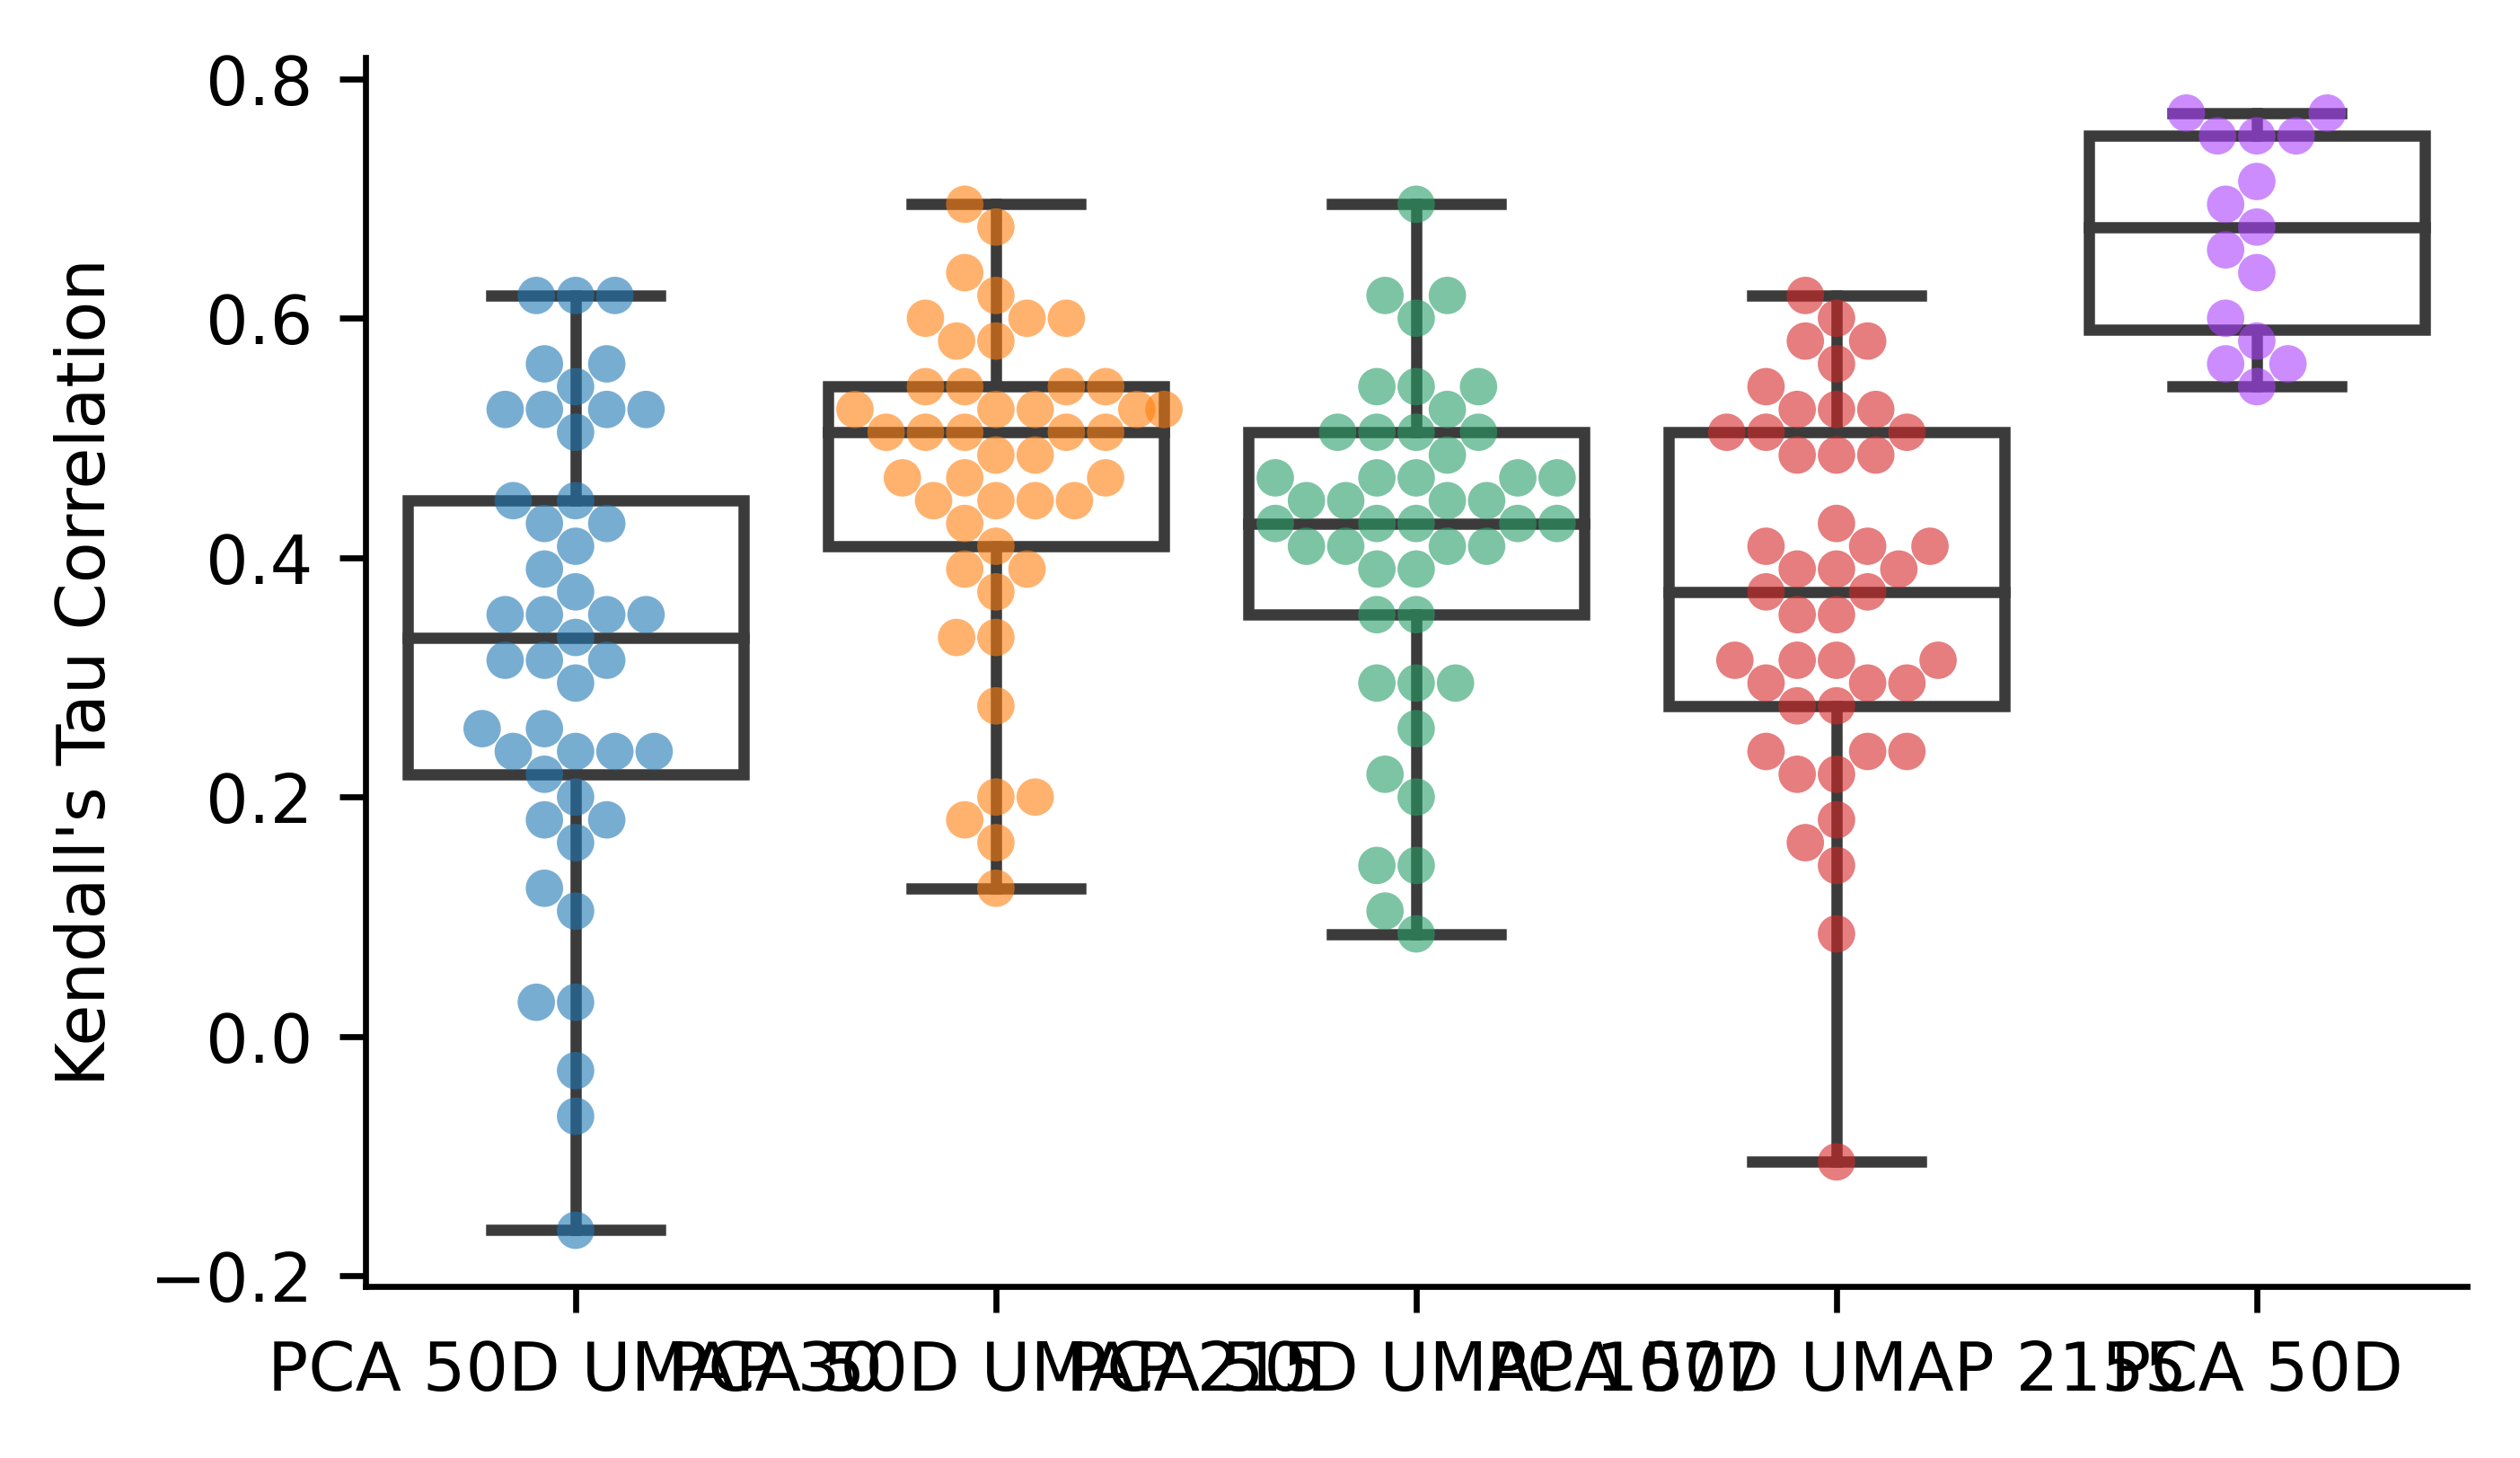

In [80]:
plotNeigh(allNeigh,size=5,axisFontSize = 9,figsize=(5,3))

In [41]:
from itertools import combinations

combos = list(combinations([1,2,3,4],2))+list(combinations([5,6,7,8],2))+list(combinations([9,10,11,12],2))

dfs = []
comparison = []
for d in combos:
  neigh = [getAllNeigh([latents[i] for i in d],[latentLab[i] for i in d],[latentType[i] for i in d],adata2.obs['Cluster'])]
  dfs += neigh
  comparison += [latentLab[list(d)[0]]+'/'+latentLab[list(d)[1]]]*len(neigh[0])
d50 = pd.concat(dfs)
d50['Comparison'] = comparison
d50.head()

Latent       Tau                        Comparison
0  PCA 50D UMAP 215  0.523810  PCA 50D UMAP 30/PCA 50D UMAP 215
1  PCA 50D UMAP 215  0.600000  PCA 50D UMAP 30/PCA 50D UMAP 215
2  PCA 50D UMAP 215  0.123810  PCA 50D UMAP 30/PCA 50D UMAP 215
3  PCA 50D UMAP 215  0.561905  PCA 50D UMAP 30/PCA 50D UMAP 215
4  PCA 50D UMAP 215 -0.066667  PCA 50D UMAP 30/PCA 50D UMAP 215

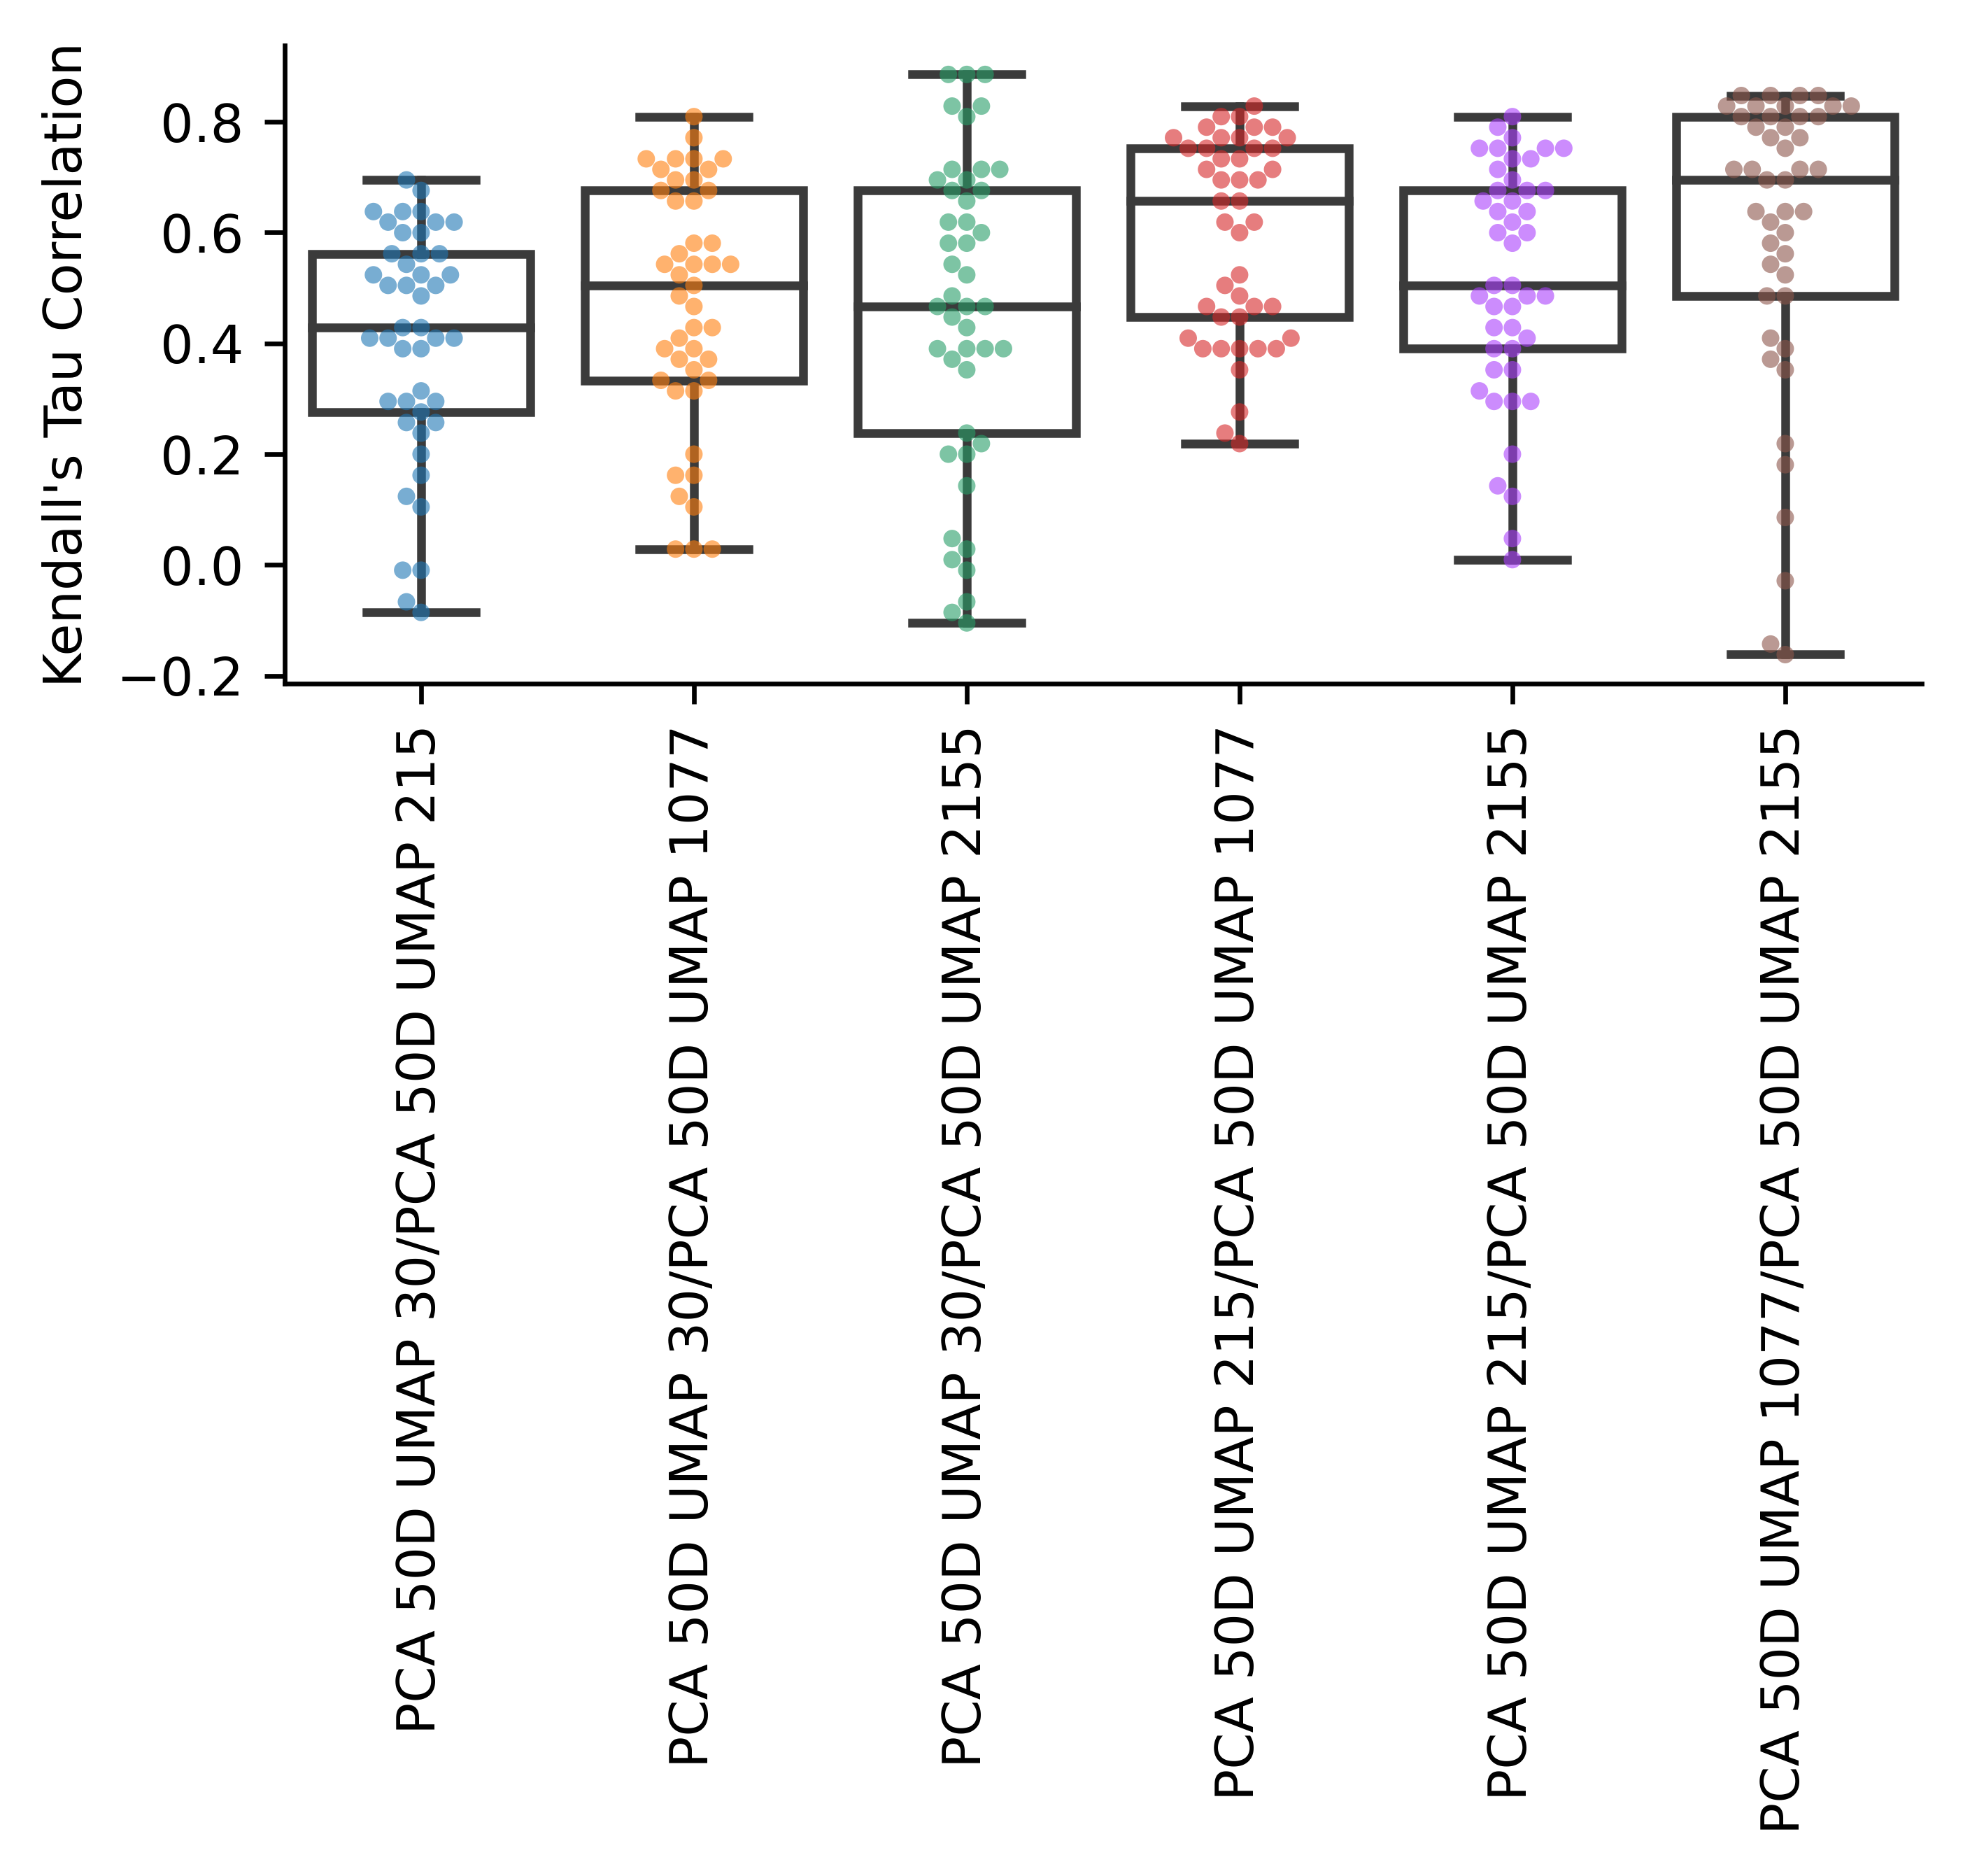

In [81]:
plotNeigh(d50,size=3,axisFontSize = 9,figsize=(5,2),latent='Comparison',rot=True)

In [49]:
namesForCol = pd.unique(adata2.obs['Cluster'])
palette = {}
for i in range(len(namesForCol)):
  palette[namesForCol[i]] = colors[i]


PCA 50D UMAP 30


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 215


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 1077


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 2155


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


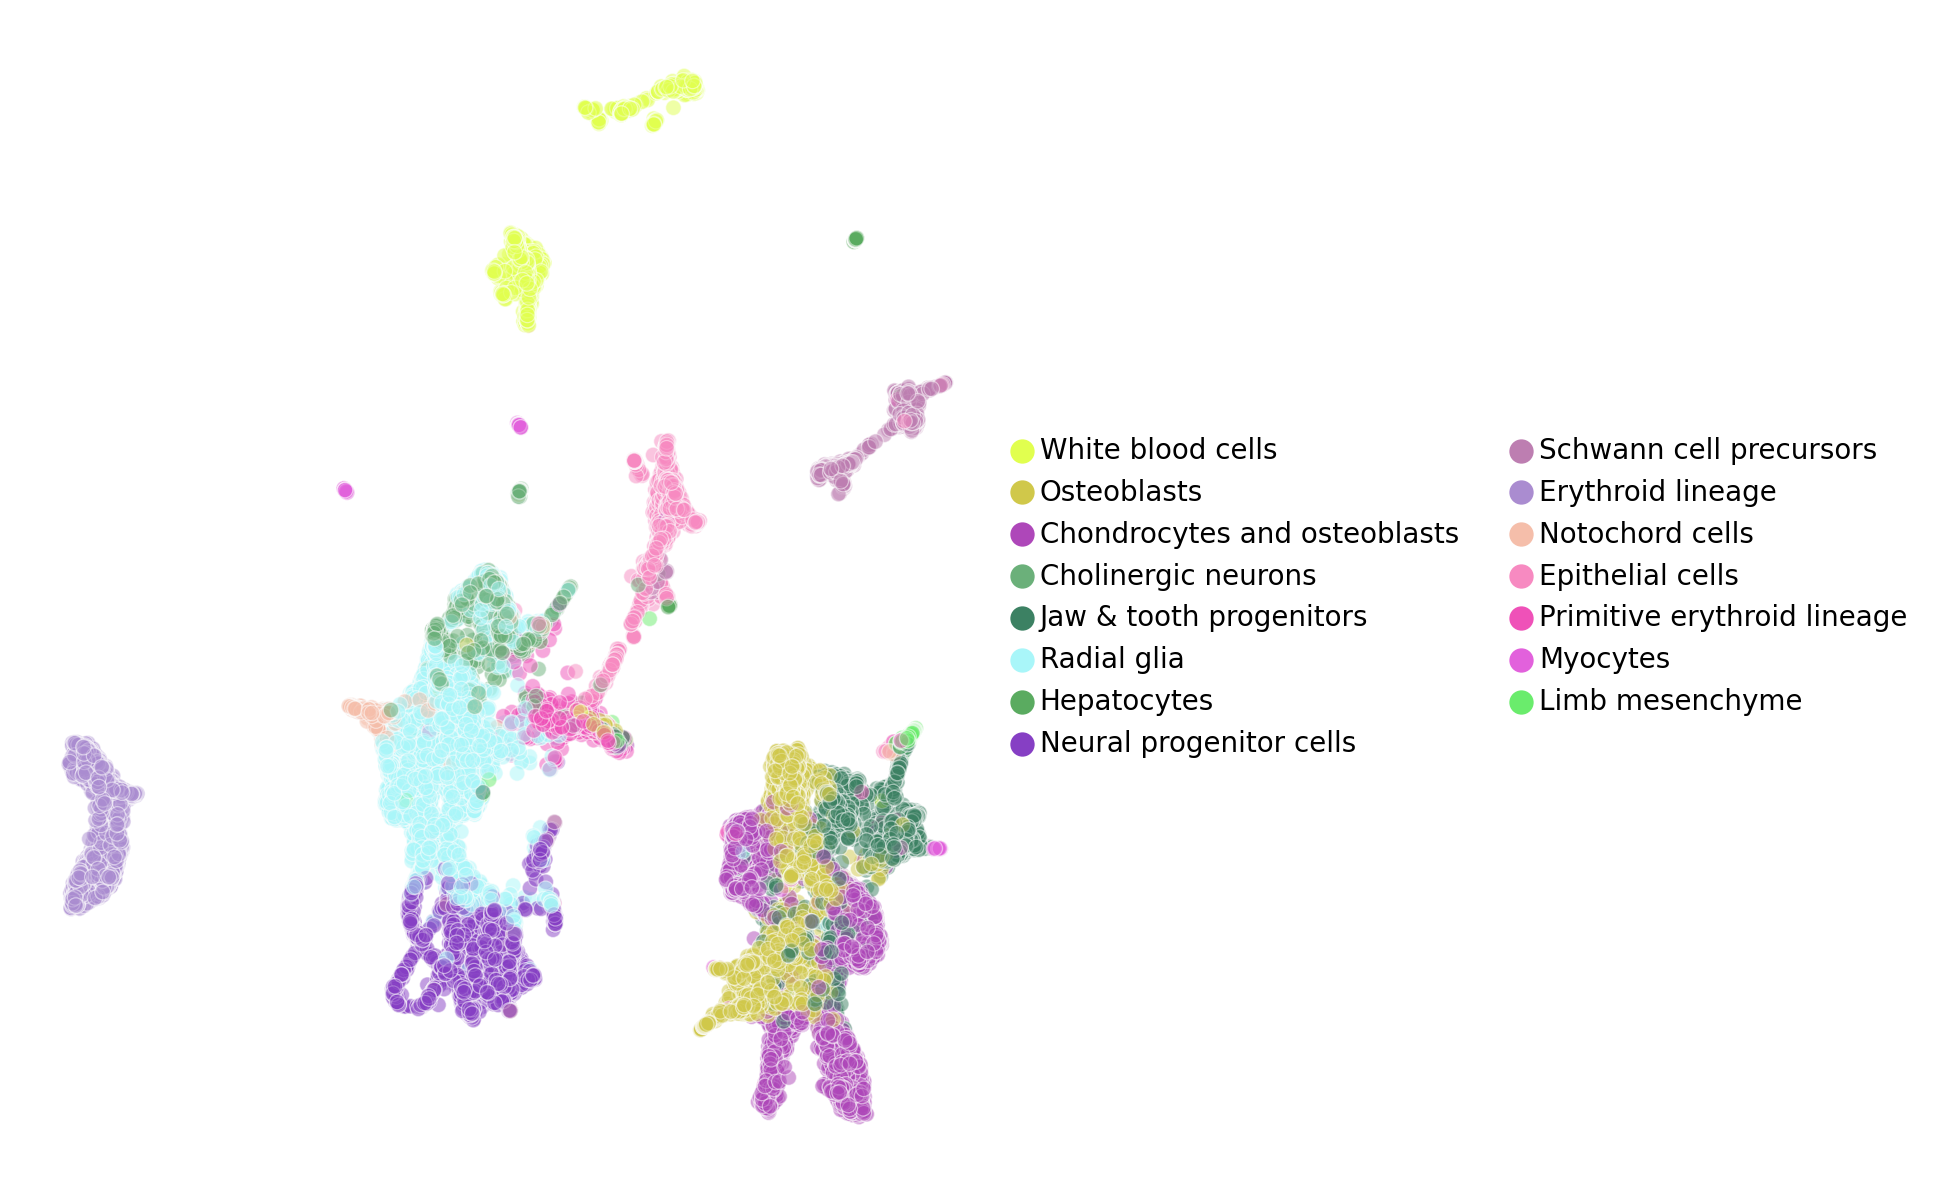

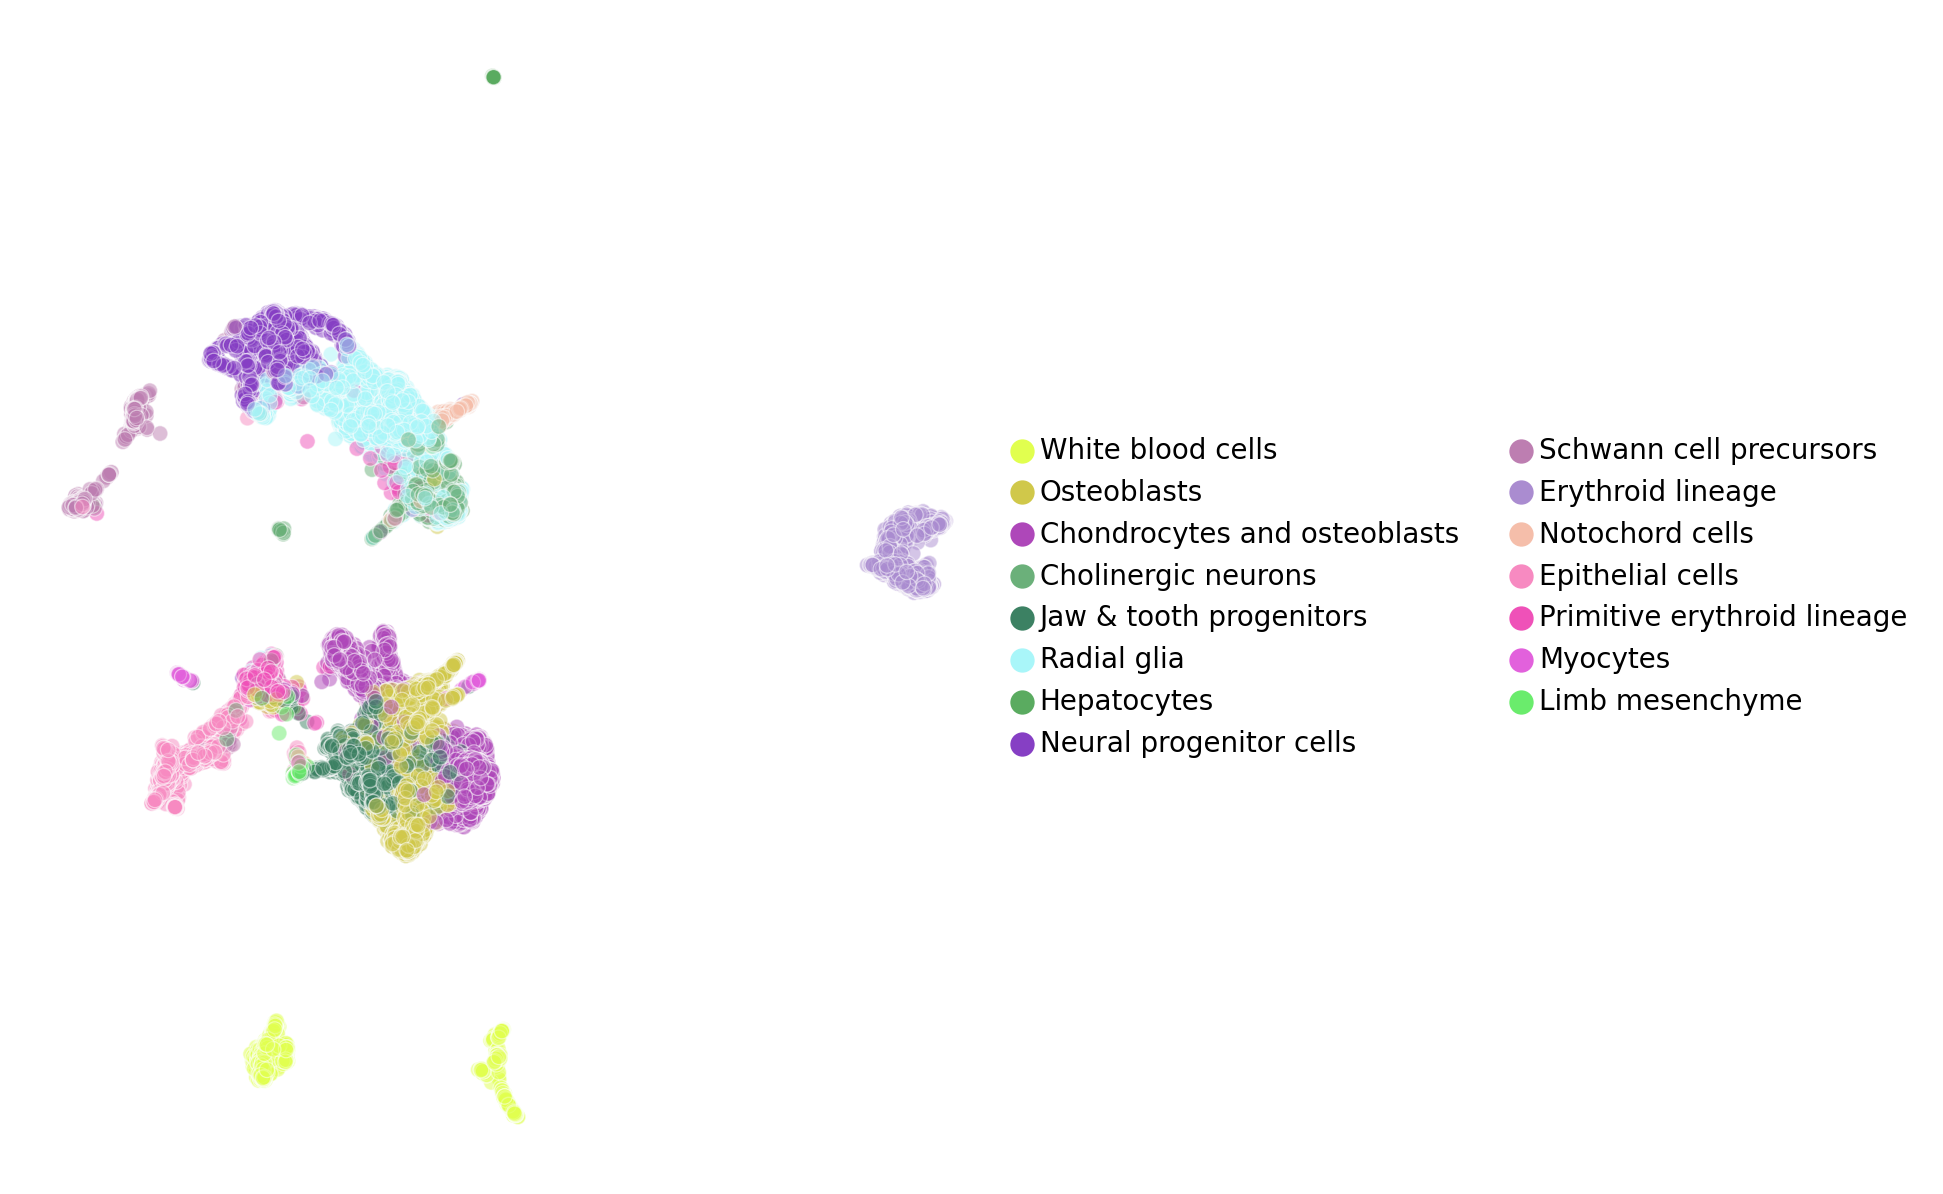

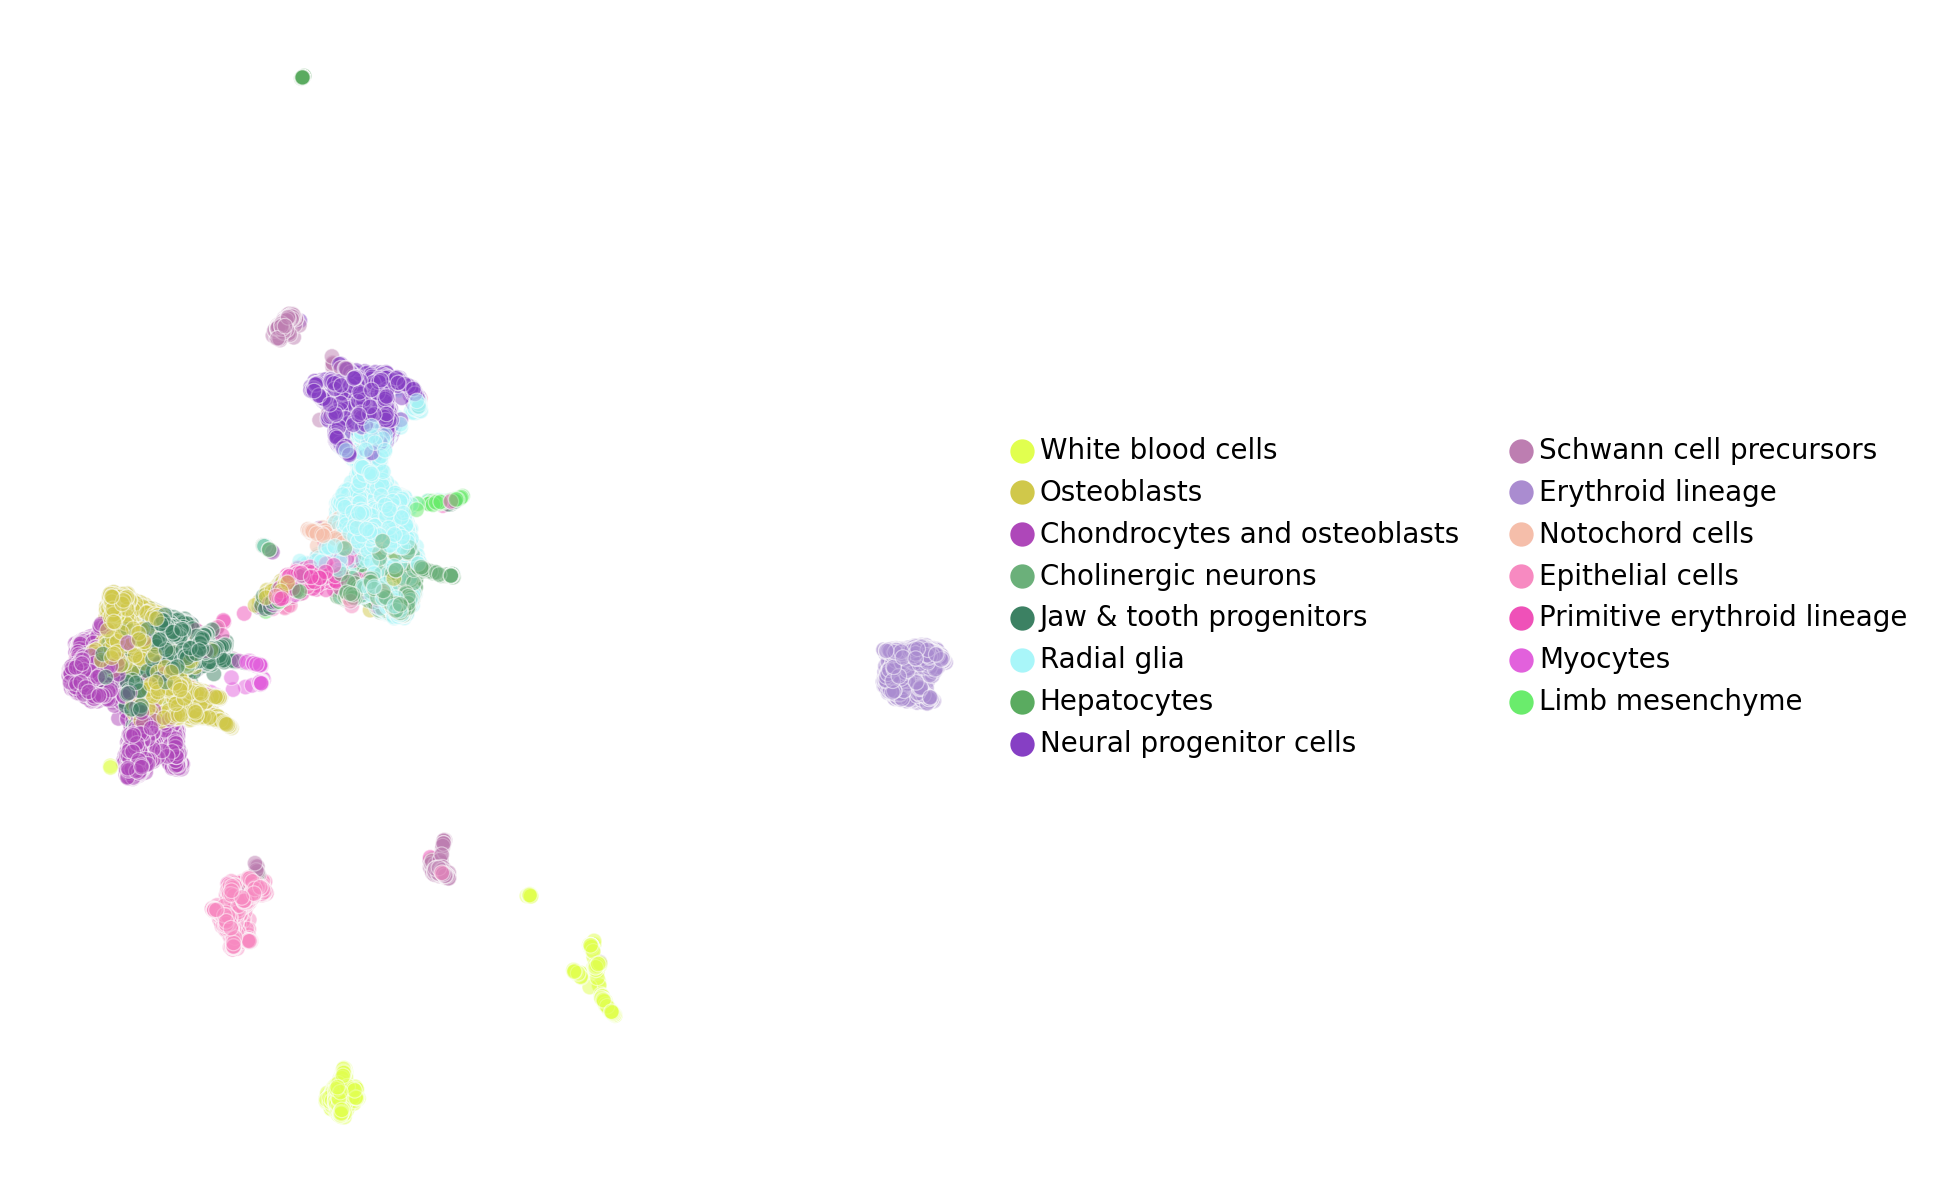

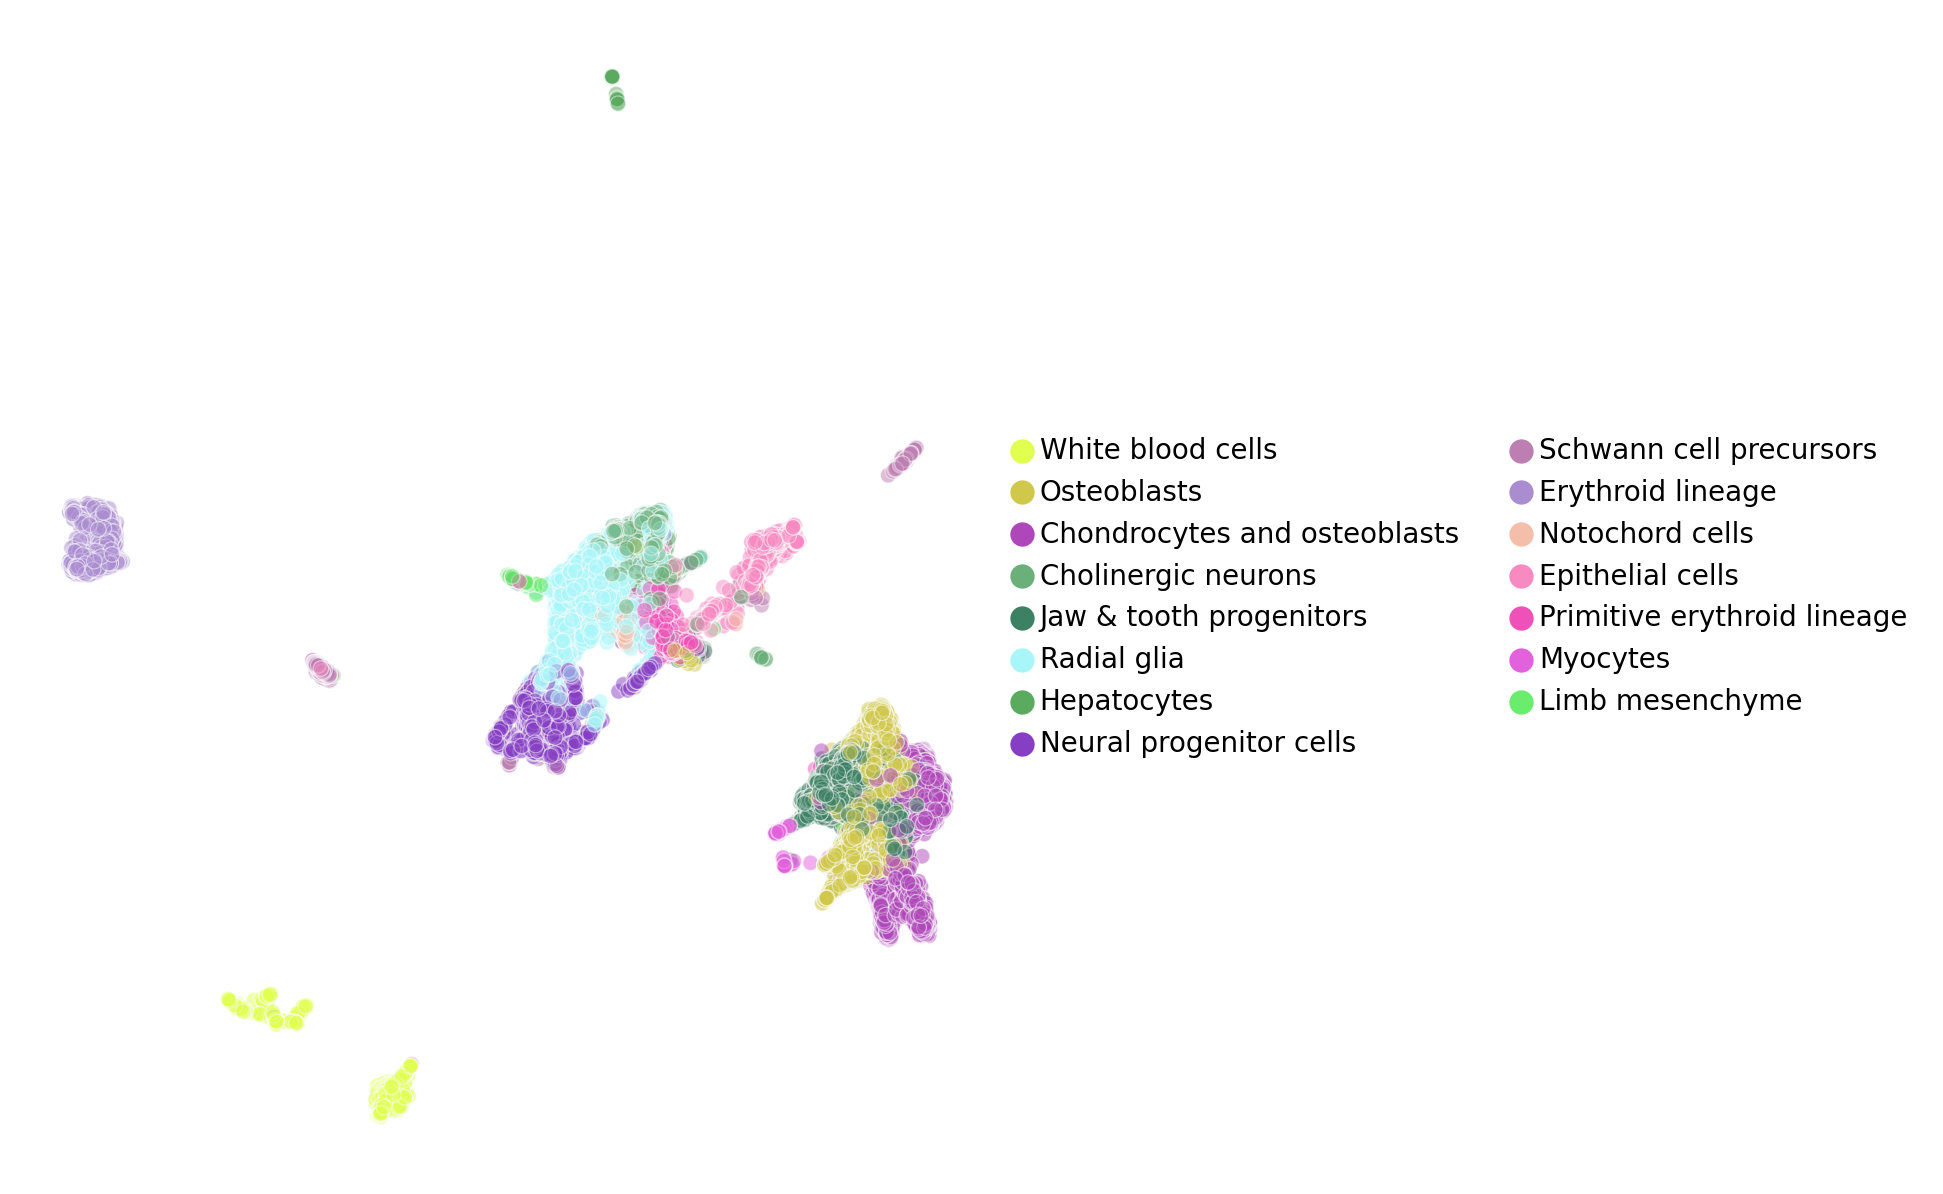

In [57]:
for i in [1,6,11,4]: #Choose random umaps to compare
  print(latentLab[i])
  obj_plot_embed(latents[i], adata2.obs['Cluster'], fname = 'inutero_'+str(latentLab[i])+'_UMAP.pdf', palette=palette,alpha= 0.5,figsize=(8,5))
    

Flip plot coloring and See how kmeans clustering does

In [53]:
from sklearn.cluster import KMeans

PCA 50D UMAP 30


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 215


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 1077


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PCA 50D UMAP 2155


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


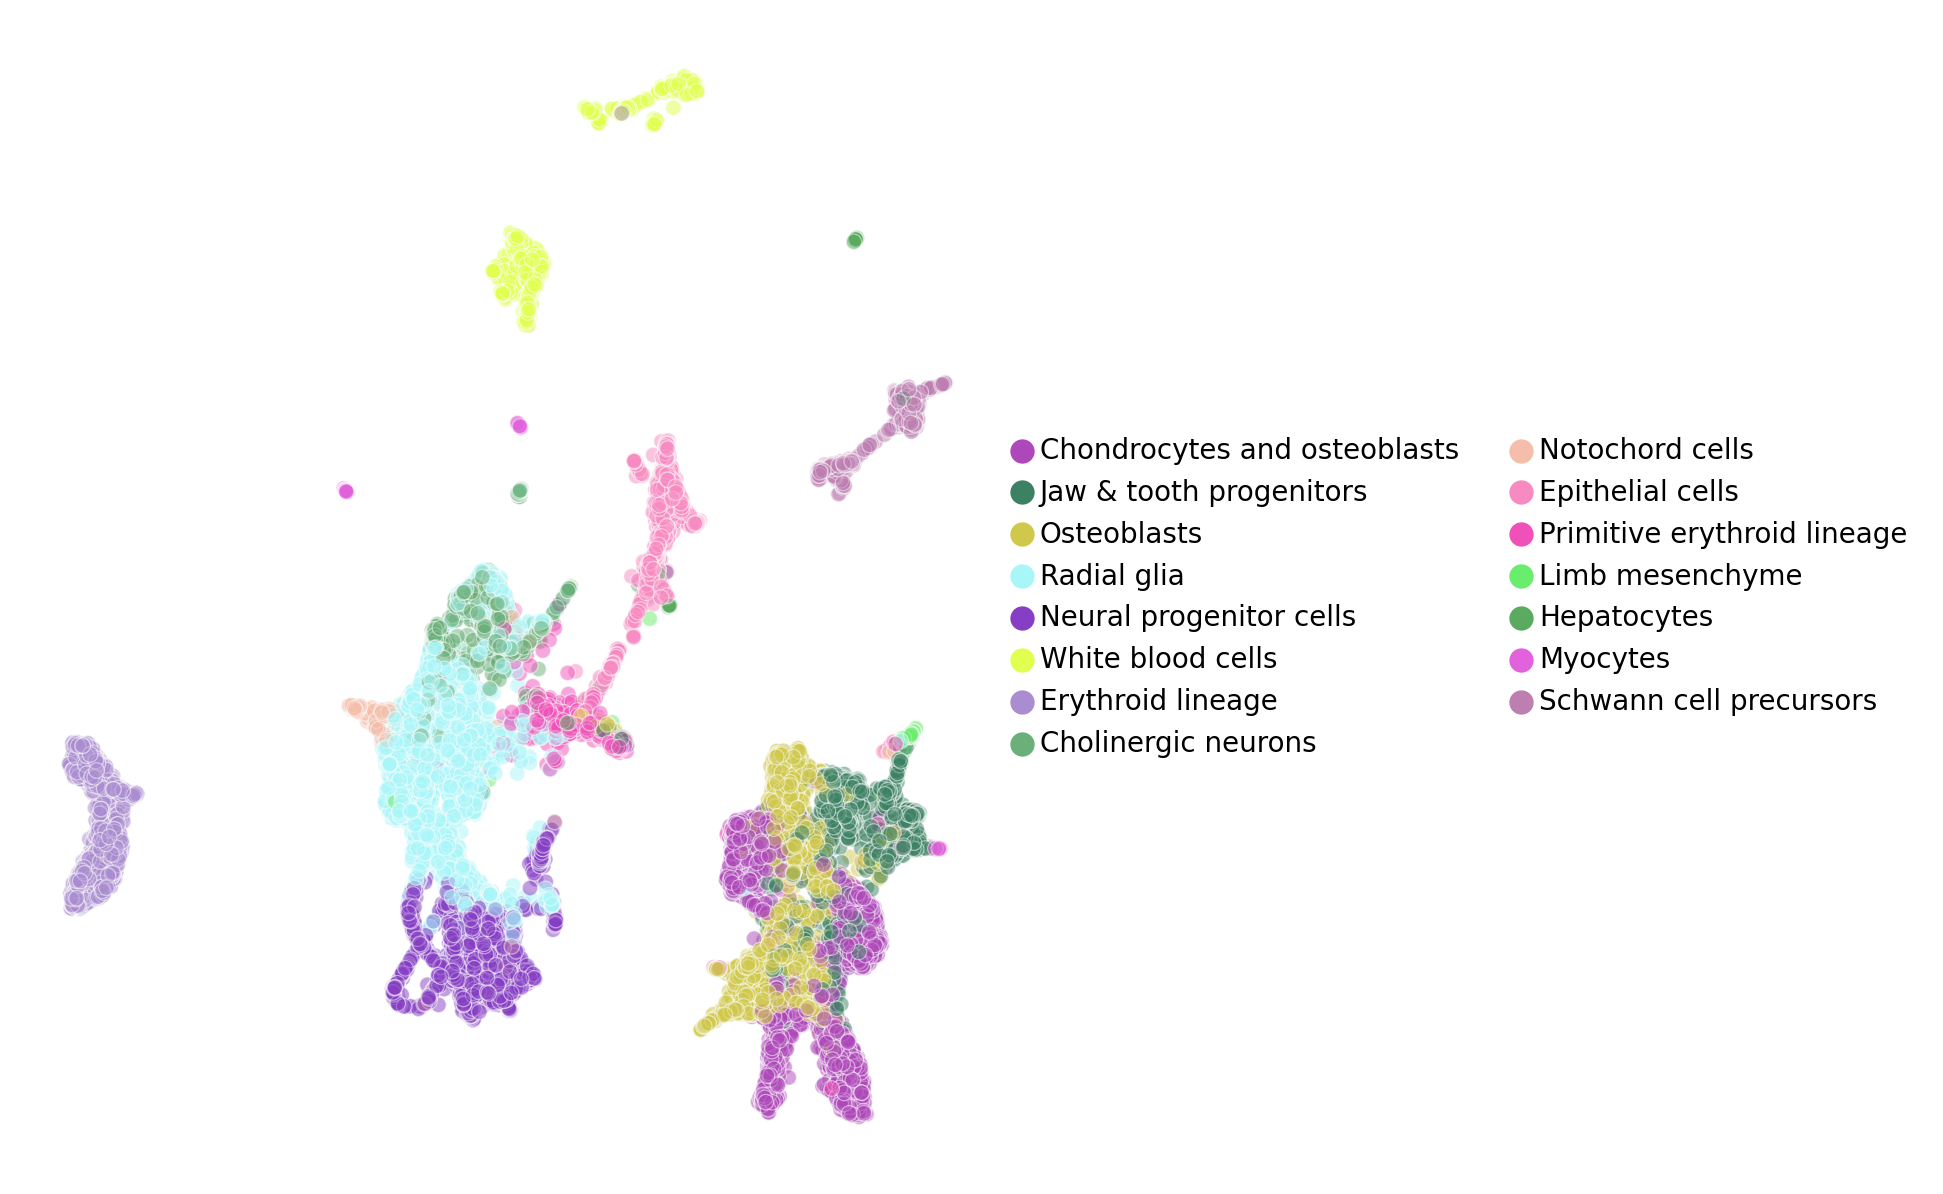

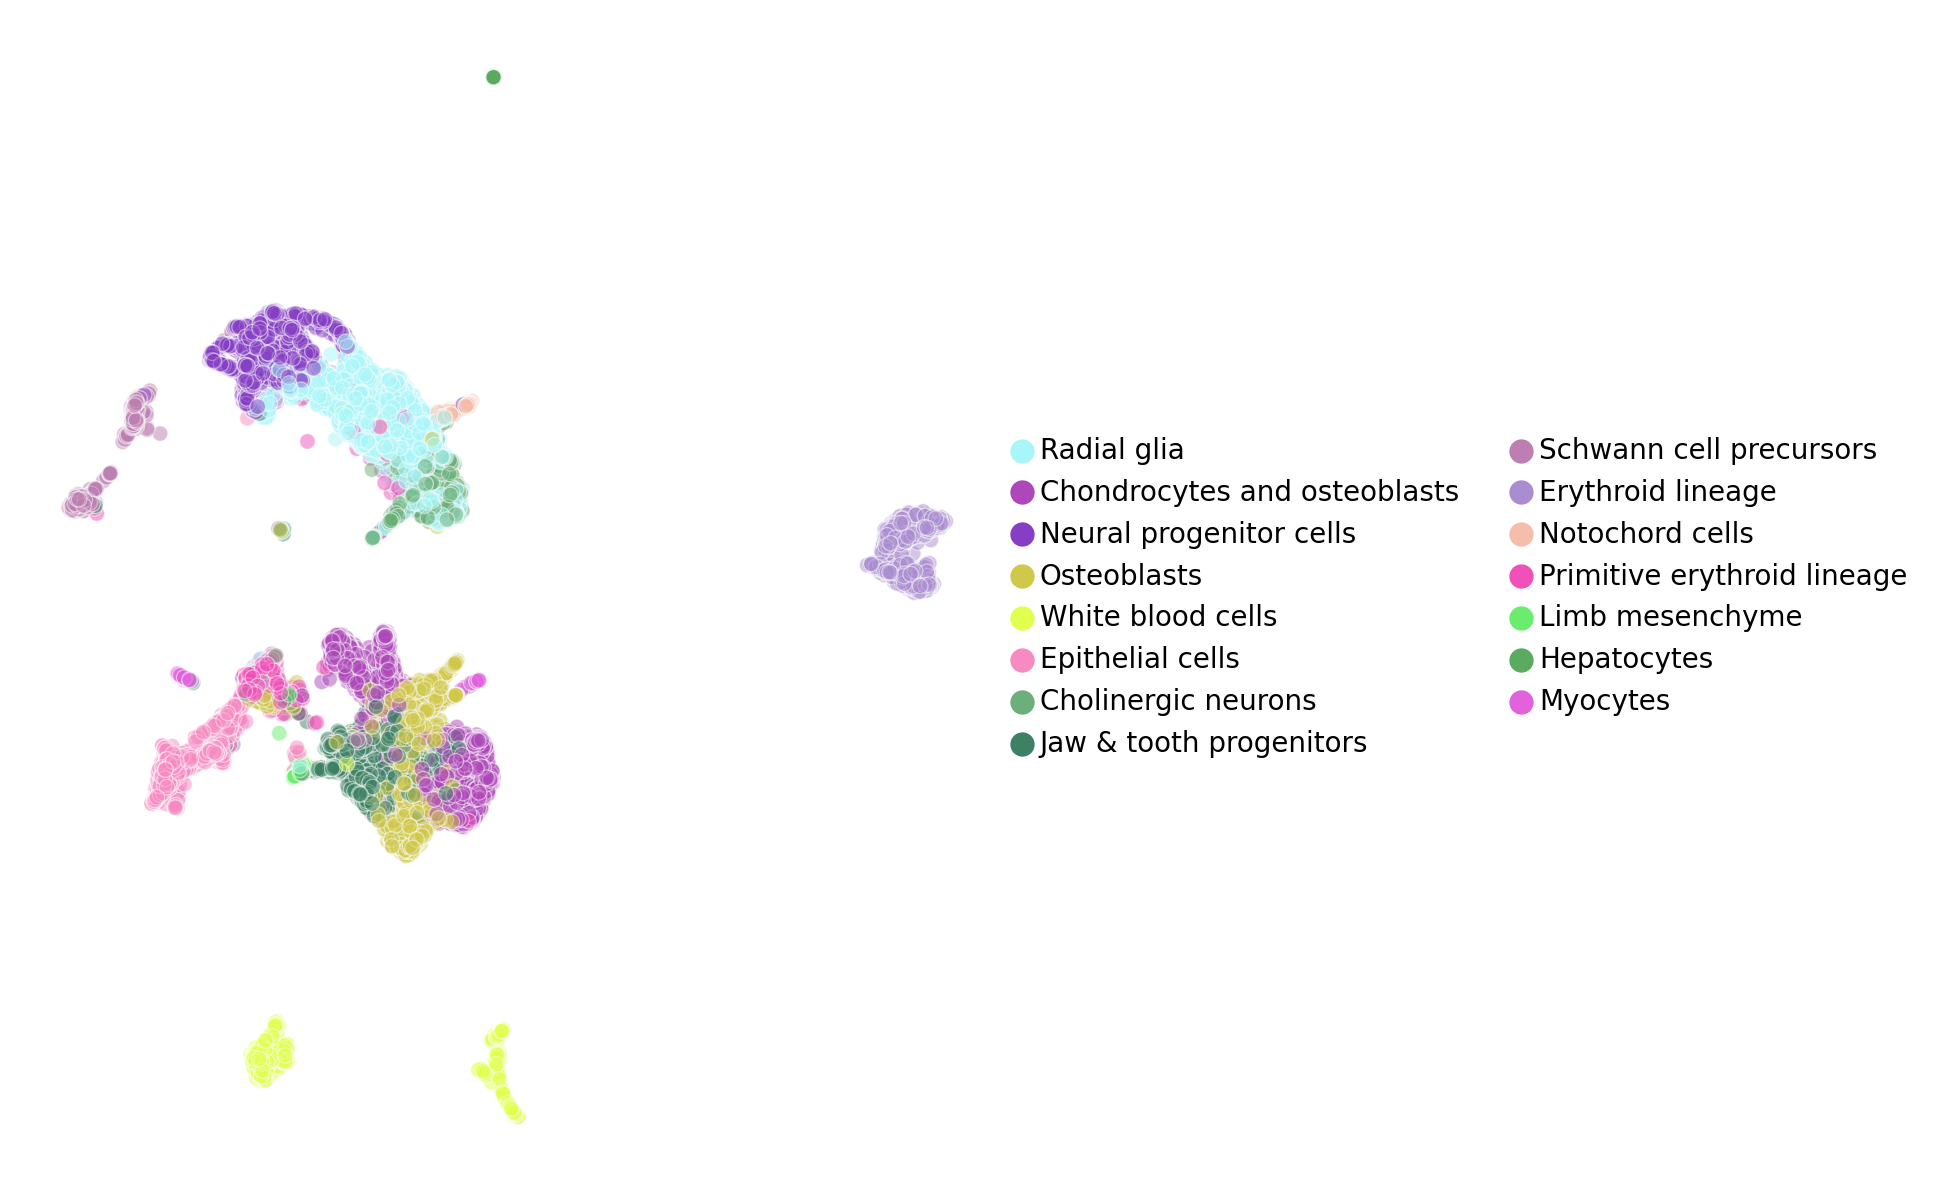

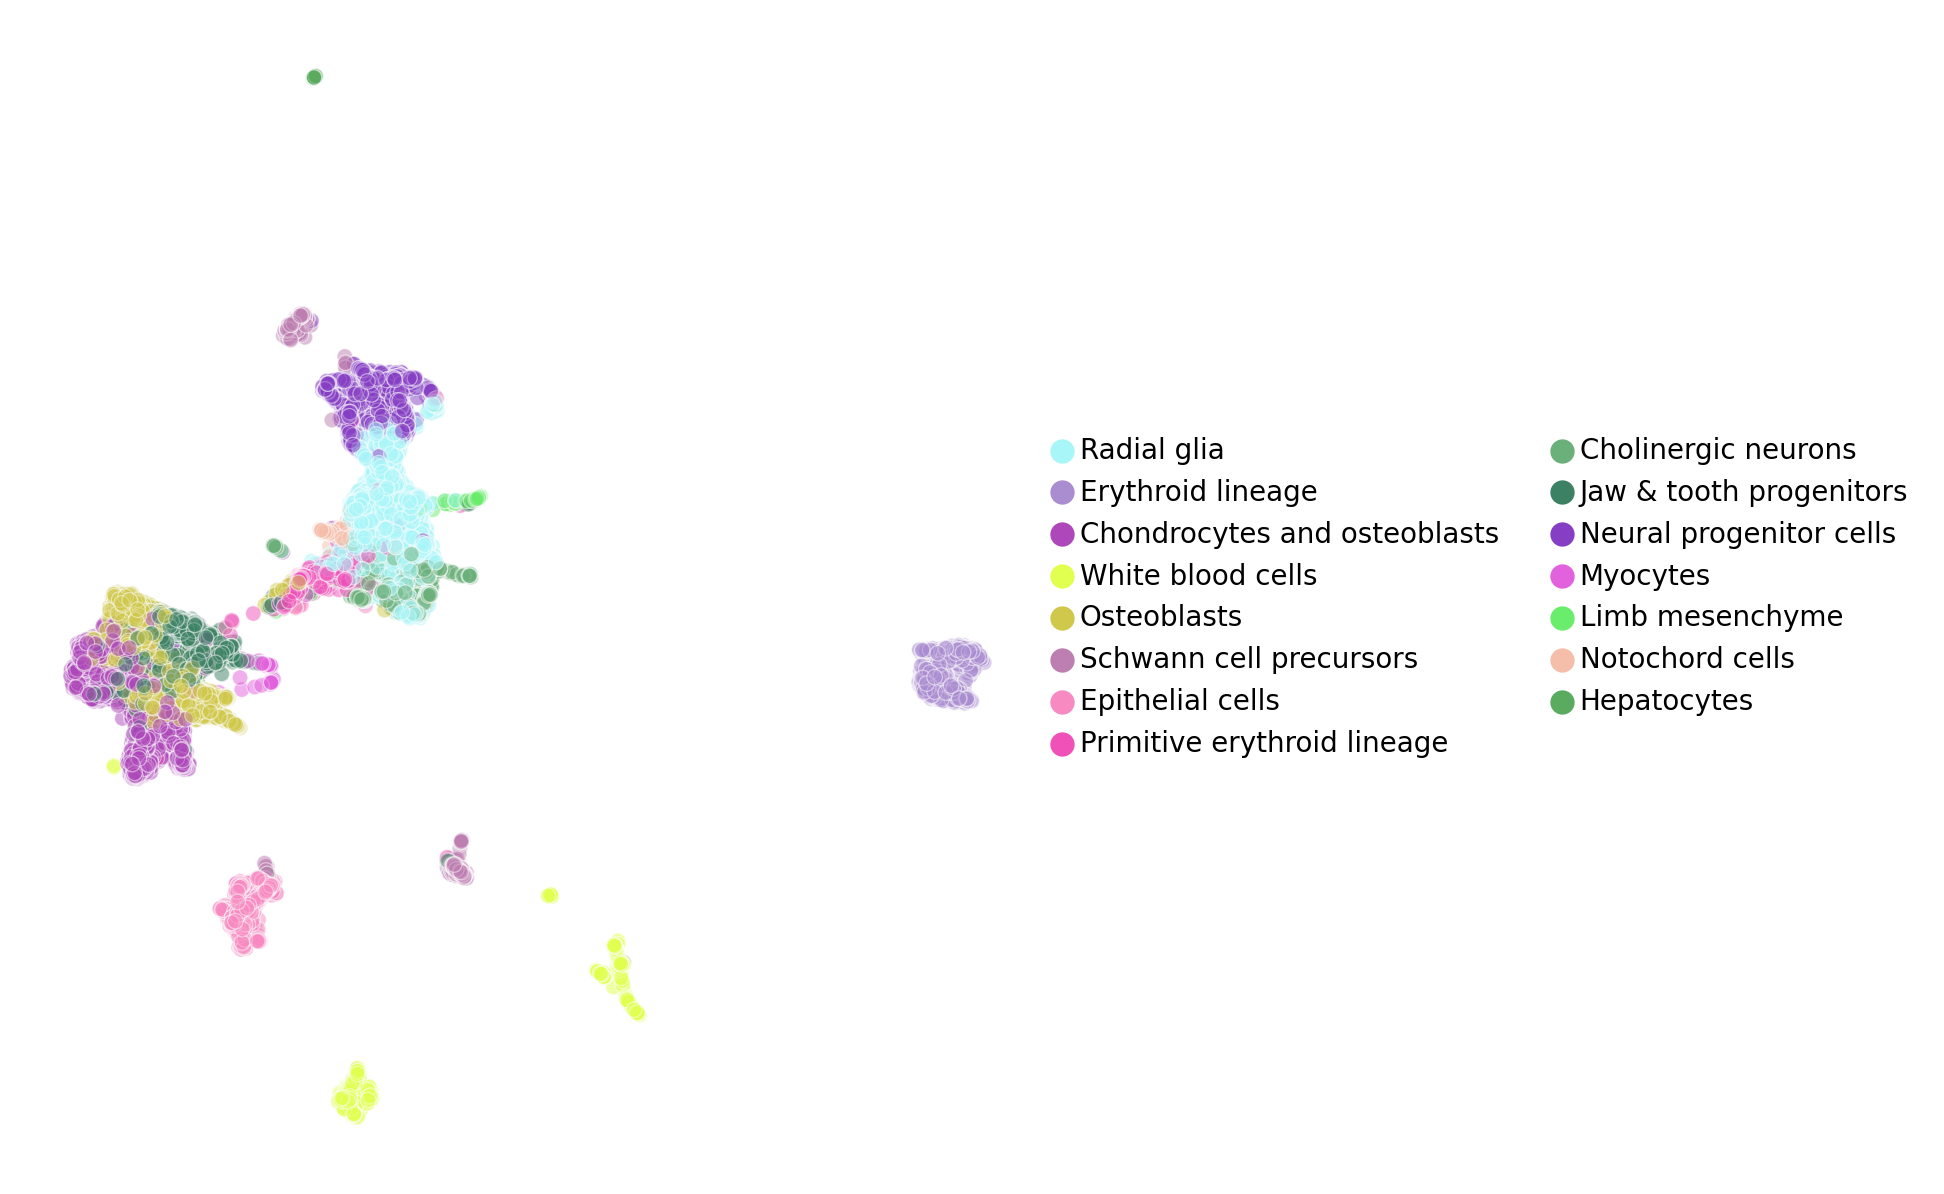

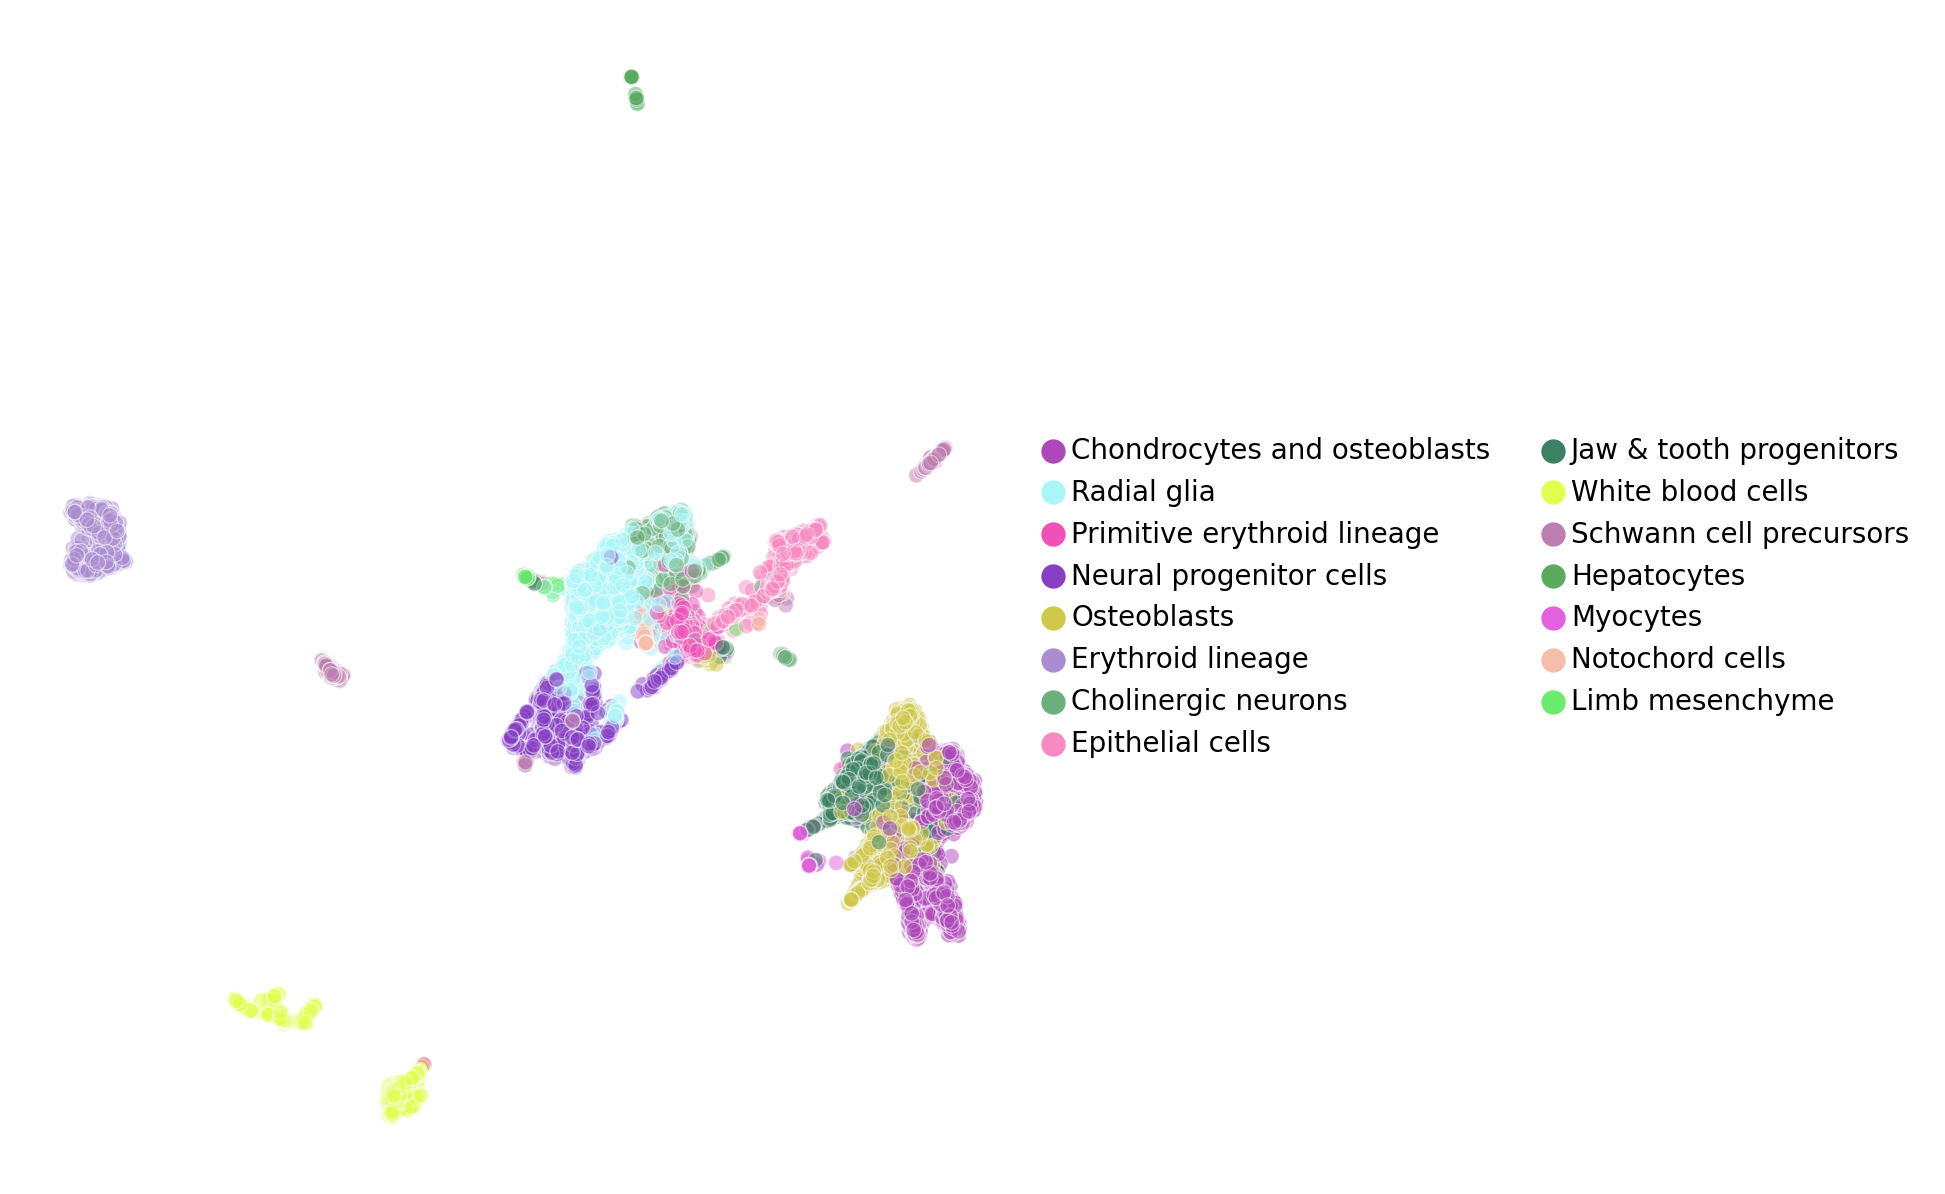

In [58]:
#colorsFlip = [palette[i] for i in pd.unique(adata2.obs['Cluster'][::-1])]
#This is just randomly shuffling cell indices

for i in [1,6,11,4]:
  print(latentLab[i])
  obj_plot_embed_flip(latents[i], adata2.obs['Cluster'], fname = 'flip_inutero_'+str(latentLab[i])+'_UMAP.pdf' , palette=palette,alpha= 0.5,figsize=(8,5))
    

/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

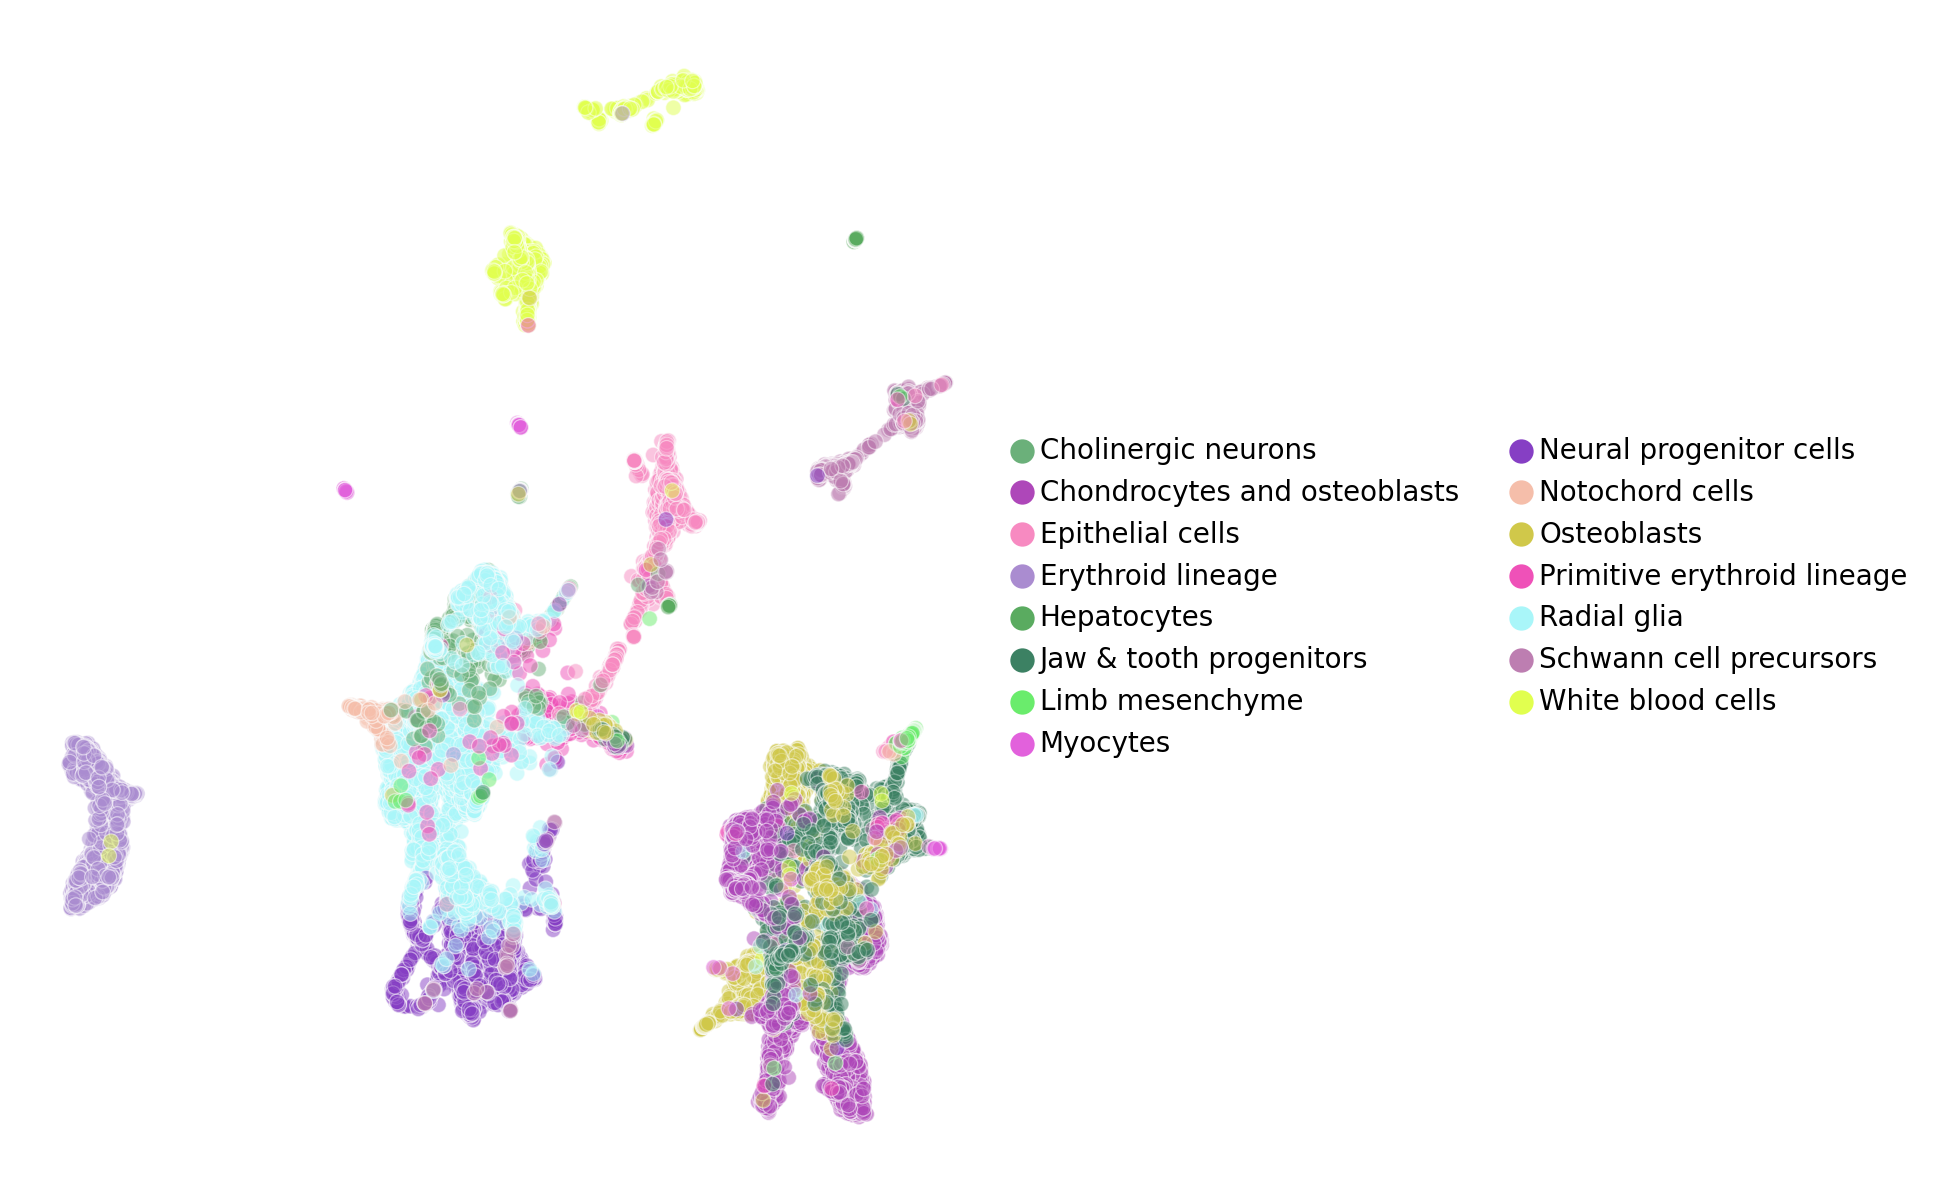

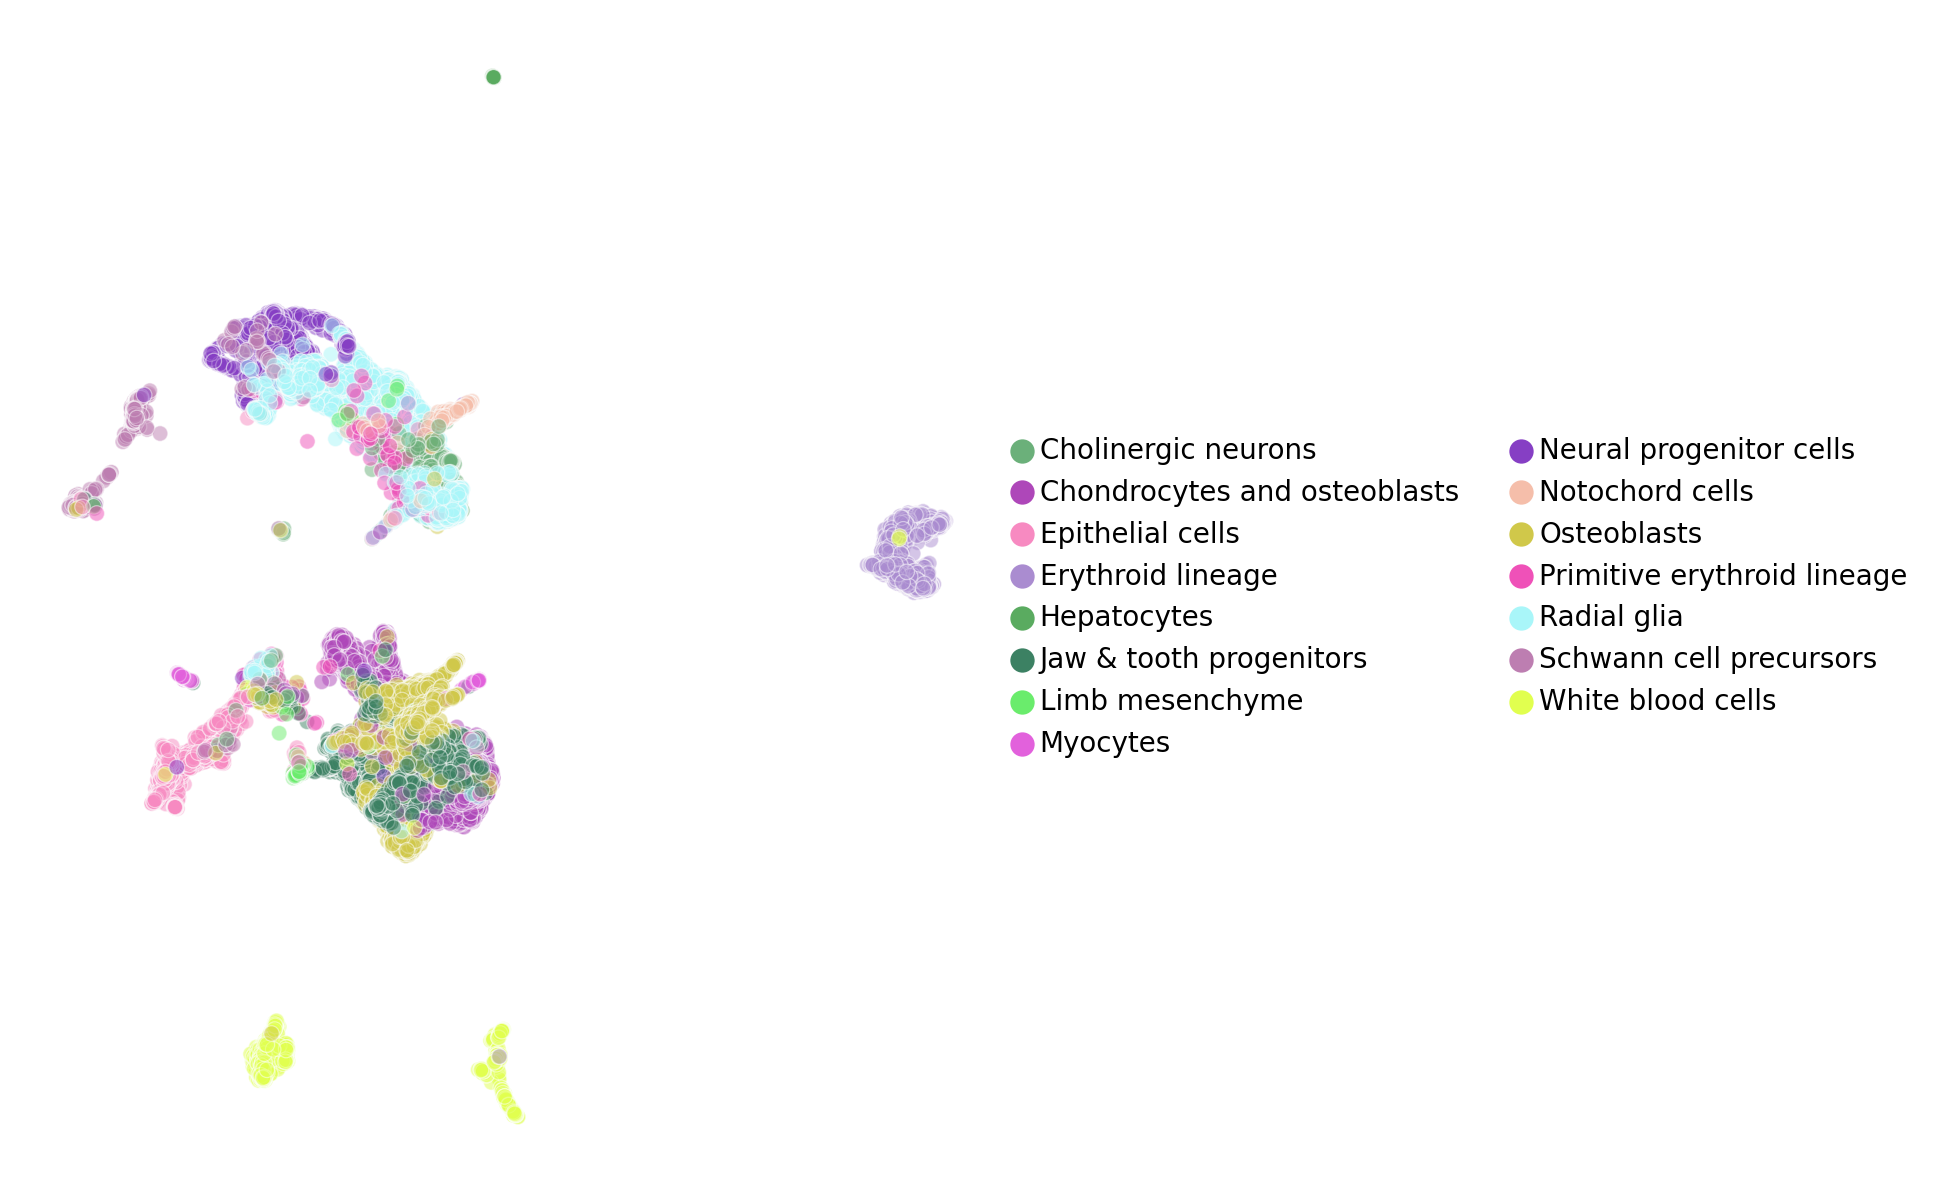

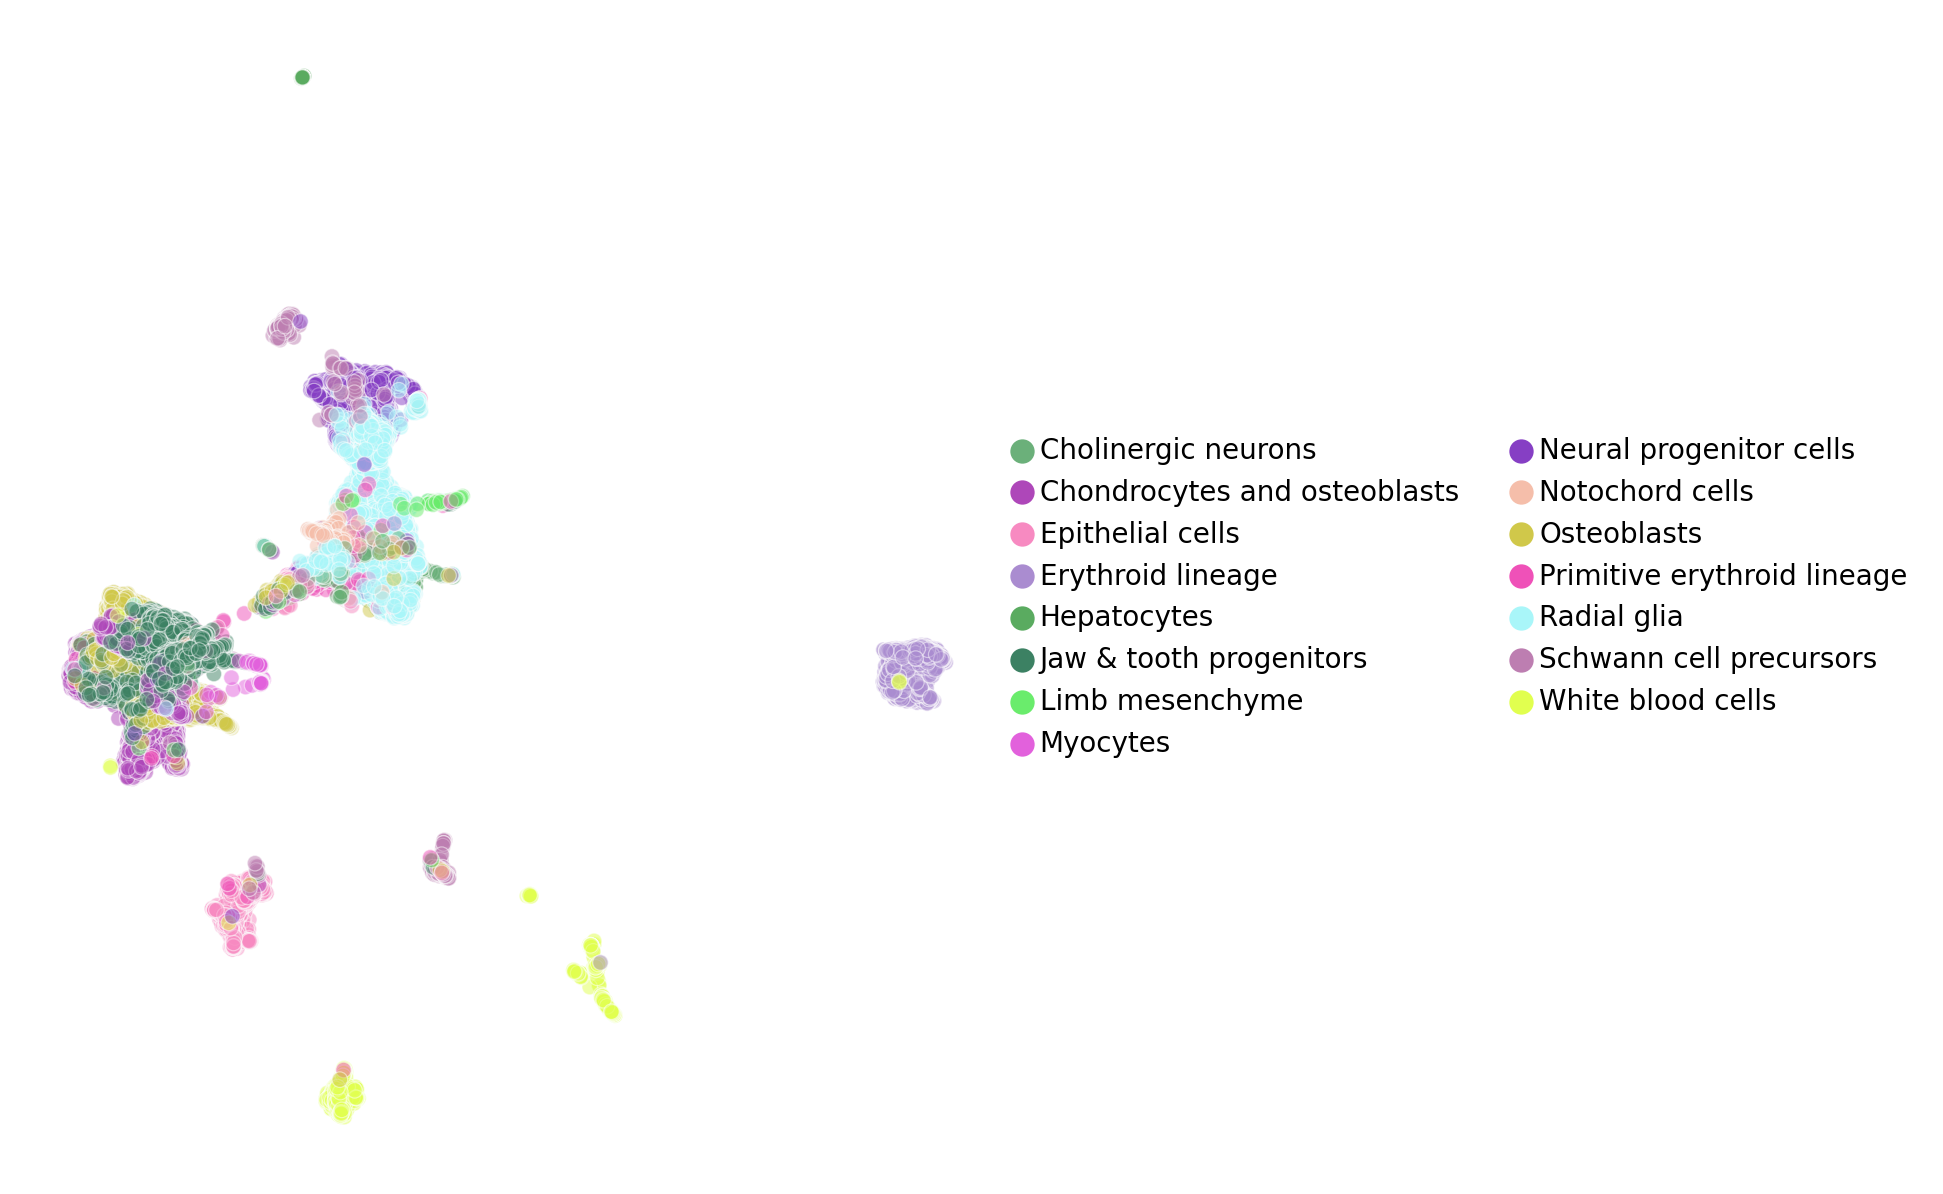

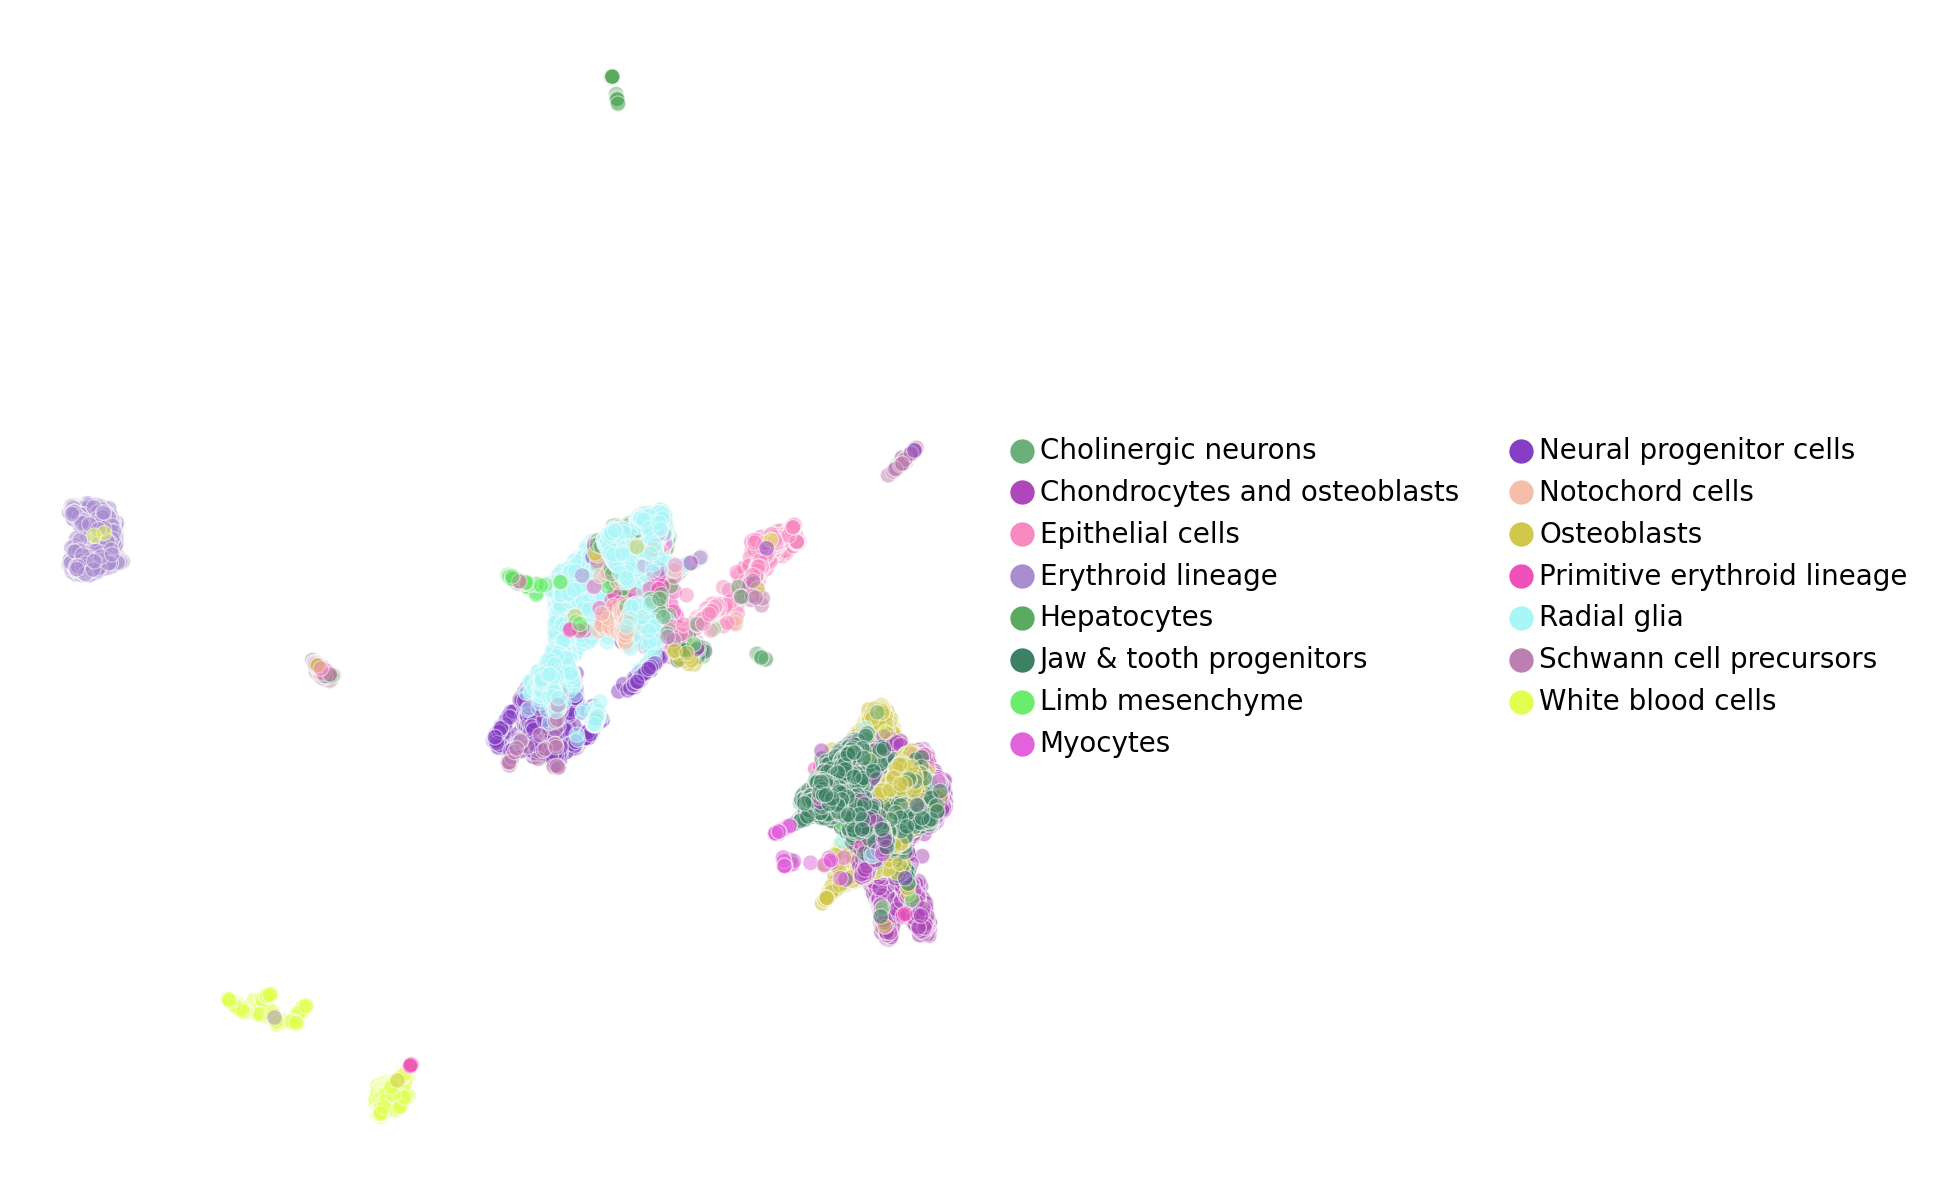

In [89]:
allKmeansLabs = []
for i in [1,6,11,4]:
    kmeans_model_umap = KMeans(n_clusters=len(np.unique(adata2.obs['Cluster'])), random_state=42).fit(latents[i])
    labelsUMAP = kmeans_model_umap.labels_
    allKmeansLabs += [labelsUMAP]

    #plot covered cells on top
    plotOnTop(latents[i],palette,labelsUMAP,adata2.obs['Cluster'], size=20,figsize=(8,5),fname = 'onTop_inutero_'+str(latentLab[i])+'_UMAP.pdf')


  #plotOnTop(latents[i],palette,labelsUMAP,adata2.obs['Cluster'], size=5)
  #vis.obj_plot_embed(latents[i], meta.smartseq_cluster, fname = '2DNCA.pdf', colors=clus_colors )

In [61]:
len(allKmeansLabs)

4

/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

0.7374055970424747


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

0.7567732099101386


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

0.7426428123252242


/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/tchari/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

0.7482619305426332


Cluster  Fraction        Embedding
0             White blood cells  0.610535  PCA 50D UMAP 30
1                   Osteoblasts  0.423256  PCA 50D UMAP 30
2  Chondrocytes and osteoblasts  0.430153  PCA 50D UMAP 30
3           Cholinergic neurons  0.914754  PCA 50D UMAP 30
4       Jaw & tooth progenitors  0.639864  PCA 50D UMAP 30

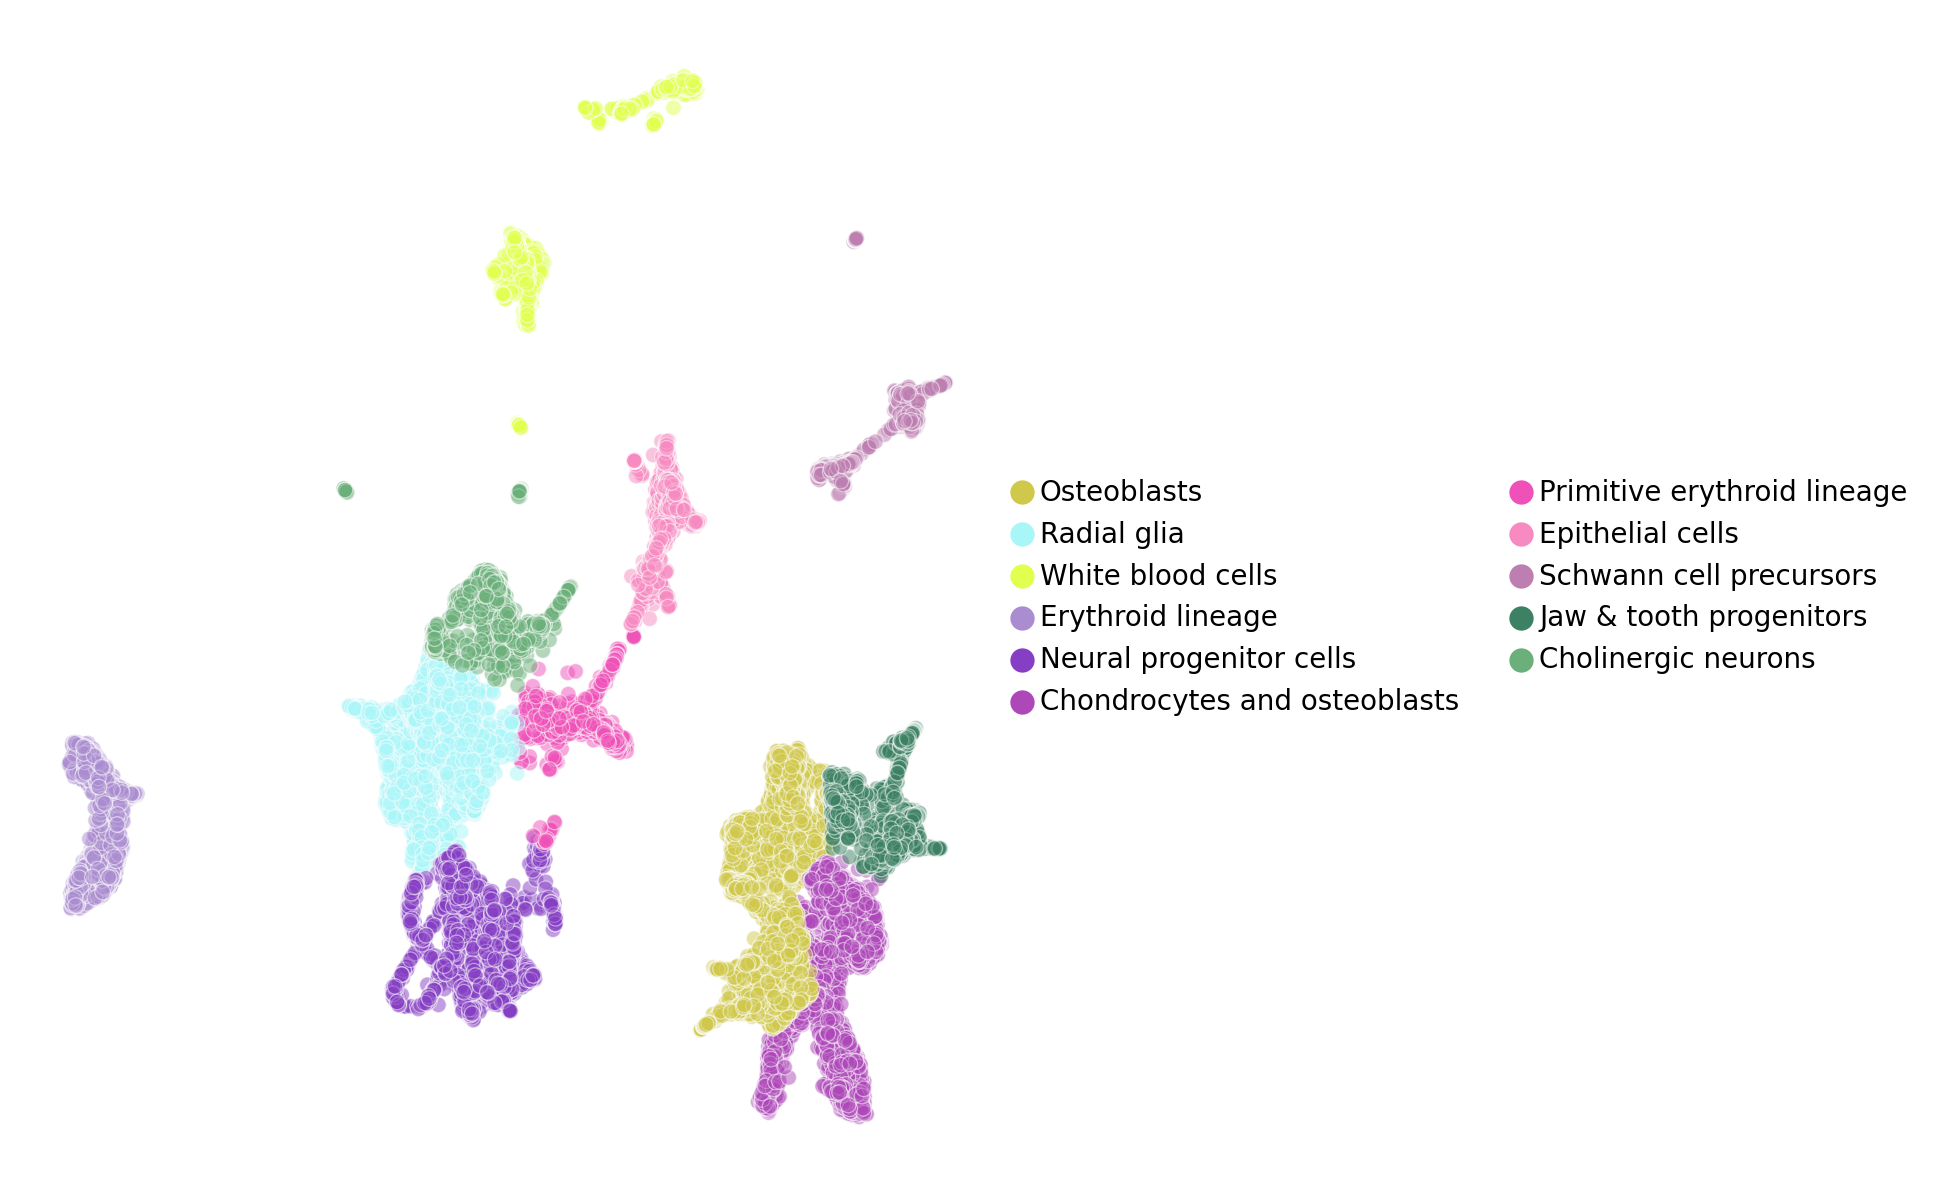

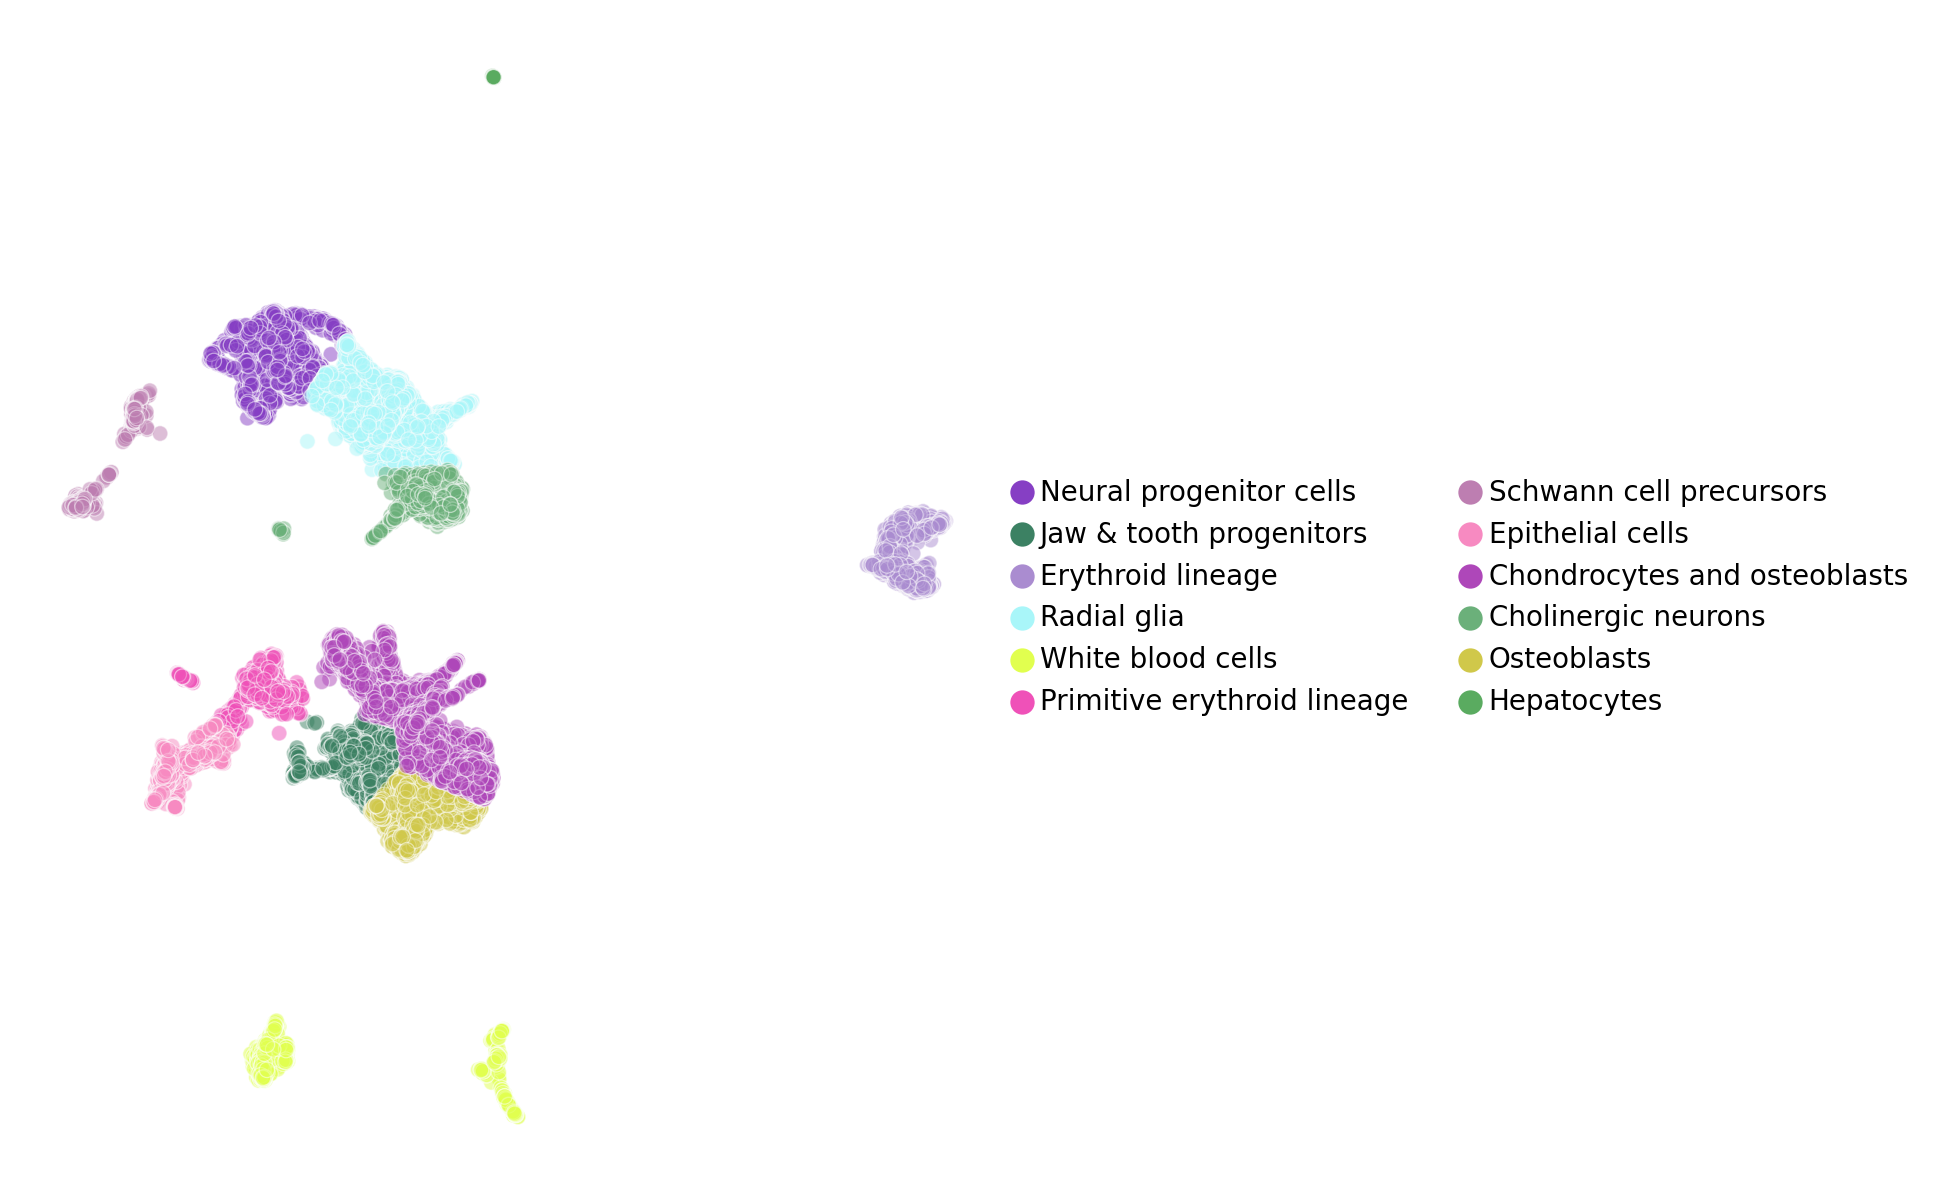

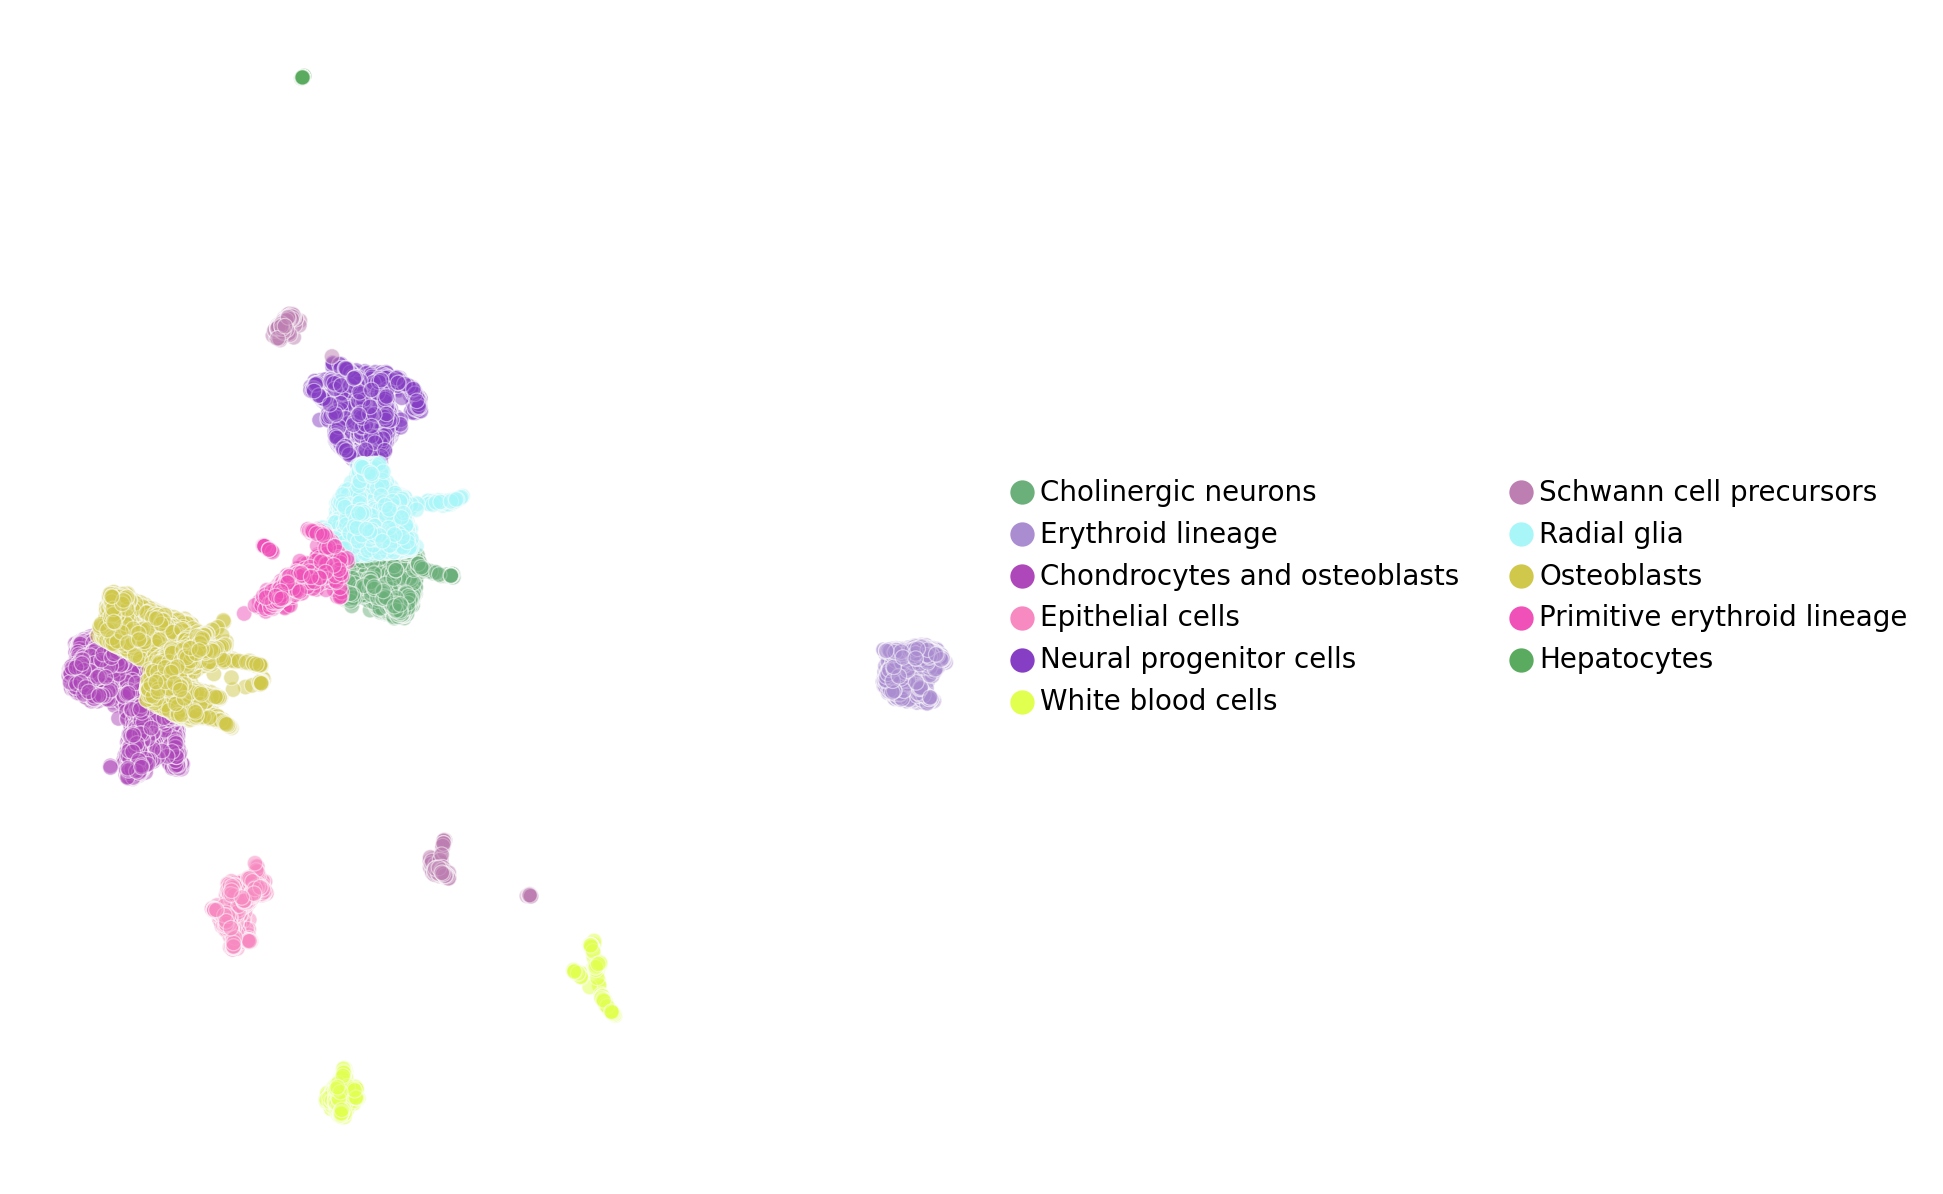

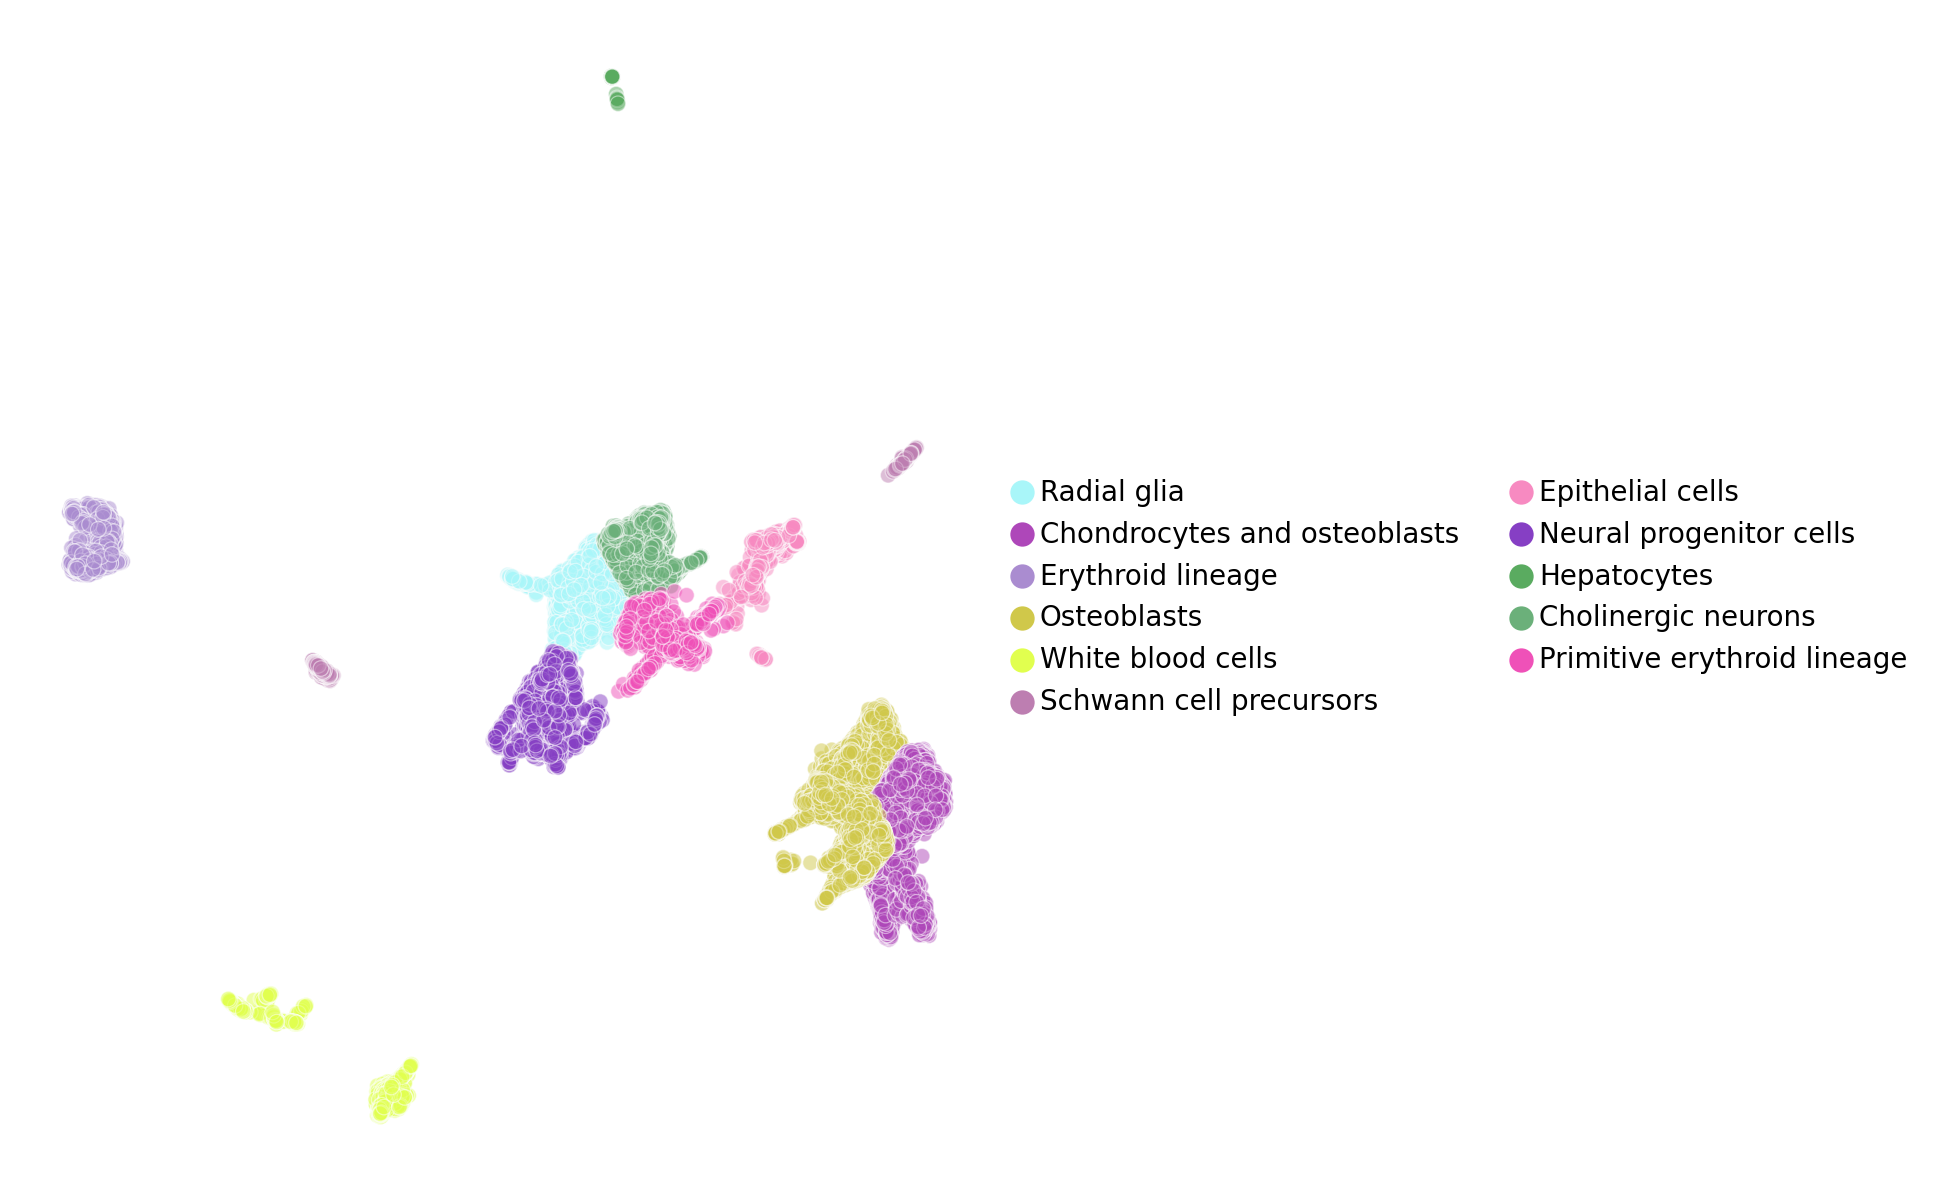

In [91]:
#UMAP
df = []
umaps = [1,6,11,4]
for i in range(len(allKmeansLabs)):
    means = [getKMeans(allKmeansLabs[i],adata2.obs['Cluster'],latentLab[umaps[i]])]
    df += means
    plotKmeans(latents[umaps[i]],palette,allKmeansLabs[i],adata2.obs['Cluster'], size=20,figsize=(8,5),fname='kmeans_inutero_'+str(latentLab[umaps[i]])+'_UMAP.pdf')

    print(np.mean(means[0].Fraction))

dAll = pd.concat(df)
dAll.head()

In [69]:
dAll

Cluster  Fraction          Embedding
0              White blood cells  0.608808    PCA 50D UMAP 15
1                    Osteoblasts  0.441503    PCA 50D UMAP 15
2   Chondrocytes and osteoblasts  0.416809    PCA 50D UMAP 15
3            Cholinergic neurons  0.763934    PCA 50D UMAP 15
4        Jaw & tooth progenitors  0.409966    PCA 50D UMAP 15
5                    Radial glia  0.524387    PCA 50D UMAP 15
6                    Hepatocytes  0.946429    PCA 50D UMAP 15
7        Neural progenitor cells  0.901990    PCA 50D UMAP 15
8        Schwann cell precursors  0.553757    PCA 50D UMAP 15
9              Erythroid lineage  0.998810    PCA 50D UMAP 15
10               Notochord cells  0.907609    PCA 50D UMAP 15
11              Epithelial cells  0.879815    PCA 50D UMAP 15
12   Primitive erythroid lineage  0.920231    PCA 50D UMAP 15
13                      Myocytes  0.563636    PCA 50D UMAP 15
14               Limb mesenchyme  0.882353    PCA 50D UMAP 15
0              White blood cells  0.606218   PCA 50D UMAP 100
1                    Osteoblasts  0.435778   PCA 50D UMAP 100
2   Chondrocytes and osteoblasts  0.435264   PCA 50D UMAP 100
3            Cholinergic neurons  0.938798   PCA 50D UMAP 100
4        Jaw & tooth progenitors  0.575878   PCA 50D UMAP 100
5                    Radial glia  0.722817   PCA 50D UMAP 100
6                    Hepatocytes  0.821429   PCA 50D UMAP 100
7        Neural progenitor cells  0.937811   PCA 50D UMAP 100
8        Schwann cell precursors  0.561850   PCA 50D UMAP 100
9              Erythroid lineage  0.998214   PCA 50D UMAP 100
10               Notochord cells  0.918478   PCA 50D UMAP 100
11              Epithelial cells  0.904468   PCA 50D UMAP 100
12   Primitive erythroid lineage  0.885549   PCA 50D UMAP 100
13                      Myocytes  0.563636   PCA 50D UMAP 100
14               Limb mesenchyme  0.848739   PCA 50D UMAP 100
0              White blood cells  0.603627   PCA 50D UMAP 215
1                    Osteoblasts  0.477281   PCA 50D UMAP 215
2   Chondrocytes and osteoblasts  0.458546   PCA 50D UMAP 215
3            Cholinergic neurons  0.946448   PCA 50D UMAP 215
4        Jaw & tooth progenitors  0.464892   PCA 50D UMAP 215
5                    Radial glia  0.715441   PCA 50D UMAP 215
6                    Hepatocytes  0.839286   PCA 50D UMAP 215
7        Neural progenitor cells  0.991045   PCA 50D UMAP 215
8        Schwann cell precursors  0.563006   PCA 50D UMAP 215
9              Erythroid lineage  0.997619   PCA 50D UMAP 215
10               Notochord cells  0.918478   PCA 50D UMAP 215
11              Epithelial cells  0.875963   PCA 50D UMAP 215
12   Primitive erythroid lineage  0.873988   PCA 50D UMAP 215
13                      Myocytes  0.563636   PCA 50D UMAP 215
14               Limb mesenchyme  0.882353   PCA 50D UMAP 215
0              White blood cells  0.607945  PCA 50D UMAP 2155
1                    Osteoblasts  0.450805  PCA 50D UMAP 2155
2   Chondrocytes and osteoblasts  0.424759  PCA 50D UMAP 2155
3            Cholinergic neurons  0.893989  PCA 50D UMAP 2155
4        Jaw & tooth progenitors  0.715742  PCA 50D UMAP 2155
5                    Radial glia  0.703307  PCA 50D UMAP 2155
6                    Hepatocytes  0.946429  PCA 50D UMAP 2155
7        Neural progenitor cells  0.942786  PCA 50D UMAP 2155
8        Schwann cell precursors  0.559538  PCA 50D UMAP 2155
9              Erythroid lineage  0.998214  PCA 50D UMAP 2155
10               Notochord cells  0.614130  PCA 50D UMAP 2155
11              Epithelial cells  0.875963  PCA 50D UMAP 2155
12   Primitive erythroid lineage  0.912139  PCA 50D UMAP 2155
13                      Myocytes  0.927273  PCA 50D UMAP 2155
14               Limb mesenchyme  0.823529  PCA 50D UMAP 2155

In [68]:
!zip inutero.zip *inutero*.pdf

updating: flip_inutero_PCA 50D UMAP 100_UMAP.pdf (deflated 1%)
updating: flip_inutero_PCA 50D UMAP 15_UMAP.pdf (deflated 1%)
updating: flip_inutero_PCA 50D UMAP 2155_UMAP.pdf (deflated 1%)
updating: flip_inutero_PCA 50D UMAP 215_UMAP.pdf (deflated 1%)
updating: inutero_PCA 50D UMAP 100_UMAP.pdf (deflated 1%)
updating: inutero_PCA 50D UMAP 15_UMAP.pdf (deflated 1%)
updating: inutero_PCA 50D UMAP 2155_UMAP.pdf (deflated 1%)
updating: inutero_PCA 50D UMAP 215_UMAP.pdf (deflated 1%)
updating: kmeans_inutero_Ambient_UMAP.pdf (deflated 4%)
updating: kmeans_inutero_PCA 50D UMAP 100_UMAP.pdf (deflated 4%)
updating: kmeans_inutero_PCA 50D UMAP 15_UMAP.pdf (deflated 4%)
updating: kmeans_inutero_PCA 50D UMAP 2155_UMAP.pdf (deflated 3%)
updating: kmeans_inutero_PCA 50D UMAP 215_UMAP.pdf (deflated 3%)
updating: onTop_inutero_PCA 50D UMAP 100_UMAP.pdf (deflated 4%)
updating: onTop_inutero_PCA 50D UMAP 15_UMAP.pdf (deflated 4%)
updating: onTop_inutero_PCA 50D UMAP 2155_UMAP.pdf (deflated 5%)
updating